In [1]:
# TRABALHO DE CONCLUSÃO DE CURSO - TCC
# ------------------------------------
# Rogerio Carlos Vieira Maciel
# Curso de Especialização em Ciência de Dados e Big Data
# PUC Minas - abril de 2021

# Carrega as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time, calendar
from copy import deepcopy
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB

# Define parâmetros gerais do ambiente
%matplotlib inline
plt.rcParams["figure.figsize"] = [15, 12]
pd.options.mode.chained_assignment = None

# Define alguns parâmetros iniciais gerais
# ----------------------------------------

# Período para análises exploratórias dos dados
ANALISES_ANO_INICIAL = 2013
ANALISES_ANO_FINAL = 2020

# Período para construção do modelo de aprendizado de máquina
MODELO_ANO_INICIAL = 2018
MODELO_ANO_FINAL = 2019

# Carga dos datasets
UTILIZAR_DATASET_REDUZIDO_PARA_ANALISES = True
CARREGAR_DATASETS_DO_REPOSITORIO_NUVEM = True
GRAVAR_DATASET_AMOSTRAS_IMP_COMPLETA = False
AMOSTRAS_IMP_COMPLETA_LOCAL = 250000
CAMINHO_AMOSTRAS_IMP_COMPLETA_LOCAL = 'd:\\datasets\\IMP_COMPLETA_AMOSTRAS.csv'

# Geração do dataset base para os modelos de aprendizado de máquina
UTILIZAR_DATASET_BASE_PRE_GRAVADO = True
GRAVAR_DATASET_BASE = False
AMOSTRAS_DATASET_BASE_PRE_GRAVADO = 100000
CAMINHO_DATASET_BASE_LOCAL = 'd:\\datasets\\DF_BASE.csv'

# Estrutura de dados para armazenar parâmetros do modelo preditivo
class Lista_Param_Modelo:
    l_co_pais = None
    l_co_urf = None
    l_co_via = None
    l_sg_uf_ncm = None
    l_ncm_6 = None
    l_ncm_4 = None
    l_ncm = None 
    l_completa_co_pais = None
    l_completa_co_urf = None
    l_completa_co_via = None
    l_completa_sg_uf_ncm = None
    l_completa_ncm_6 = None
    l_completa_ncm_4 = None
    l_completa_ncm = None 
    opcao_NCM=4
    qtd_amostras = 1000
    proporcao_teste=0.2
    imprimir_parametros=False
    imprimir_resultados=True
    otimizar_com_grid_search = False
    versao='0.0.0'
    
# Semente para o gerador de números aleatórios
i_SEED = 12345678


In [2]:
# Carga dos datasets utilizados no trabalho
# Item 3.1.1 do TCC
# -----------------

if CARREGAR_DATASETS_DO_REPOSITORIO_NUVEM:
    if UTILIZAR_DATASET_REDUZIDO_PARA_ANALISES:
        df_orig_imp_completa = pd.read_csv(
            'https://raw.githubusercontent.com/rogmac/TCC/main/datasets/IMP_COMPLETA_AMOSTRAS.csv',
            sep=';')
    else:
        df_orig_imp_completa = pd.read_csv(filepath_or_buffer='d:\\datasets\\IMP_COMPLETA.csv',
                                   sep=';')
    
    df_orig_dolar_mensal = pd.read_csv(
        'https://raw.githubusercontent.com/rogmac/TCC/main/datasets/DOLAR_MENSAL.csv',
         sep=';', dtype={'ANO_MES': np.str}, decimal=',')
    df_orig_ncm = pd.read_csv('https://raw.githubusercontent.com/rogmac/TCC/main/datasets/NCM.csv',
         sep=';',encoding='latin1')
    df_orig_ncm_sh = pd.read_csv('https://raw.githubusercontent.com/rogmac/TCC/main/datasets/NCM_SH.csv',
         sep=';', encoding='latin1')
    df_orig_pais = pd.read_csv('https://raw.githubusercontent.com/rogmac/TCC/main/datasets/PAIS.csv',
         sep=';',encoding='latin1')
    df_orig_pais_bloco = pd.read_csv(
        'https://raw.githubusercontent.com/rogmac/TCC/main/datasets/PAIS_BLOCO.csv',
         sep=';', encoding='latin1')
    df_orig_uf = pd.read_csv('https://raw.githubusercontent.com/rogmac/TCC/main/datasets/UF.csv',
         sep=';',encoding='latin1')
    df_orig_via = pd.read_csv('https://raw.githubusercontent.com/rogmac/TCC/main/datasets/VIA.csv',
         sep=';',encoding='latin1')
    df_orig_urf = pd.read_csv('https://raw.githubusercontent.com/rogmac/TCC/main/datasets/URF.csv',
         sep=';',encoding='latin1')
else:
    # Carrega os datasets originais (disponibilizados nos sites do Ministério da Economia e do IPEA)
    #  (para o dataset principal, oferece a possibilidade de carregar uma amostra reduzida)
    if UTILIZAR_DATASET_REDUZIDO_PARA_ANALISES:
        df_orig_imp_completa = pd.read_csv(filepath_or_buffer=CAMINHO_AMOSTRAS_IMP_COMPLETA_LOCAL,
                                           sep=';')
    else:
        df_orig_imp_completa = pd.read_csv(filepath_or_buffer='d:\\datasets\\IMP_COMPLETA.csv',
                                           sep=';')
    
    df_orig_dolar_mensal = pd.read_csv(filepath_or_buffer='d:\\datasets\\DOLAR_MENSAL.csv',sep=';', 
                                           dtype={'ANO_MES': np.str}, decimal=',')
    df_orig_ncm = pd.read_csv(filepath_or_buffer='d:\\datasets\\NCM.csv',sep=';',encoding='latin1')
    df_orig_ncm_sh = pd.read_csv(filepath_or_buffer='d:\\datasets\\NCM_SH.csv',sep=';',
                                            encoding='latin1')
    df_orig_pais = pd.read_csv(filepath_or_buffer='d:\\datasets\\PAIS.csv',sep=';',encoding='latin1')
    df_orig_pais_bloco = pd.read_csv(filepath_or_buffer='d:\\datasets\\PAIS_BLOCO.csv',sep=';',
                                            encoding='latin1')
    df_orig_uf = pd.read_csv(filepath_or_buffer='d:\\datasets\\UF.csv',sep=';',encoding='latin1')
    df_orig_via = pd.read_csv(filepath_or_buffer='d:\\datasets\\VIA.csv',sep=';',encoding='latin1')
    df_orig_urf = pd.read_csv(filepath_or_buffer='d:\\datasets\\URF.csv',sep=';',encoding='latin1')

    
# Registra as quantidades de linhas e colunas dos datasets carregados
print('Quantidades de linhas e colunas dos datasets carregados:')
print(f'    IMP_COMPLETA - {df_orig_imp_completa.shape[0]} linhas e '
      f'{df_orig_imp_completa.shape[1]} colunas' )
print(f'    DOLAR_MENSAL - {df_orig_dolar_mensal.shape[0]} linhas e '
      f'{df_orig_dolar_mensal.shape[1]} colunas' )
print(f'    NCM - {df_orig_ncm.shape[0]} linhas e '
      f'{df_orig_ncm.shape[1]} colunas' )
print(f'    NCM_SH - {df_orig_ncm_sh.shape[0]} linhas e {df_orig_ncm_sh.shape[1]} colunas' )
print(f'    PAIS - {df_orig_pais.shape[0]} linhas e {df_orig_pais.shape[1]} colunas' )
print(f'    PAIS_BLOCO - {df_orig_pais_bloco.shape[0]} linhas e '
      f'{df_orig_pais_bloco.shape[1]} colunas' )
print(f'    UF - {df_orig_uf.shape[0]} linhas e {df_orig_uf.shape[1]} colunas' )
print(f'    VIA - {df_orig_via.shape[0]} linhas e {df_orig_via.shape[1]} colunas' )
print(f'    URF - {df_orig_urf.shape[0]} linhas e {df_orig_urf.shape[1]} colunas' )

# Se desejado, grava uma amostra dos dados localmente, para uso no repositório
if GRAVAR_DATASET_AMOSTRAS_IMP_COMPLETA:
    # Seleciona amostras aleatórias, para gravar no disco
    df_temp = df_orig_imp_completa[(df_orig_imp_completa['CO_ANO'] >= ANALISES_ANO_INICIAL) & 
                                   (df_orig_imp_completa['CO_ANO'] <= ANALISES_ANO_FINAL)]
    np.random.seed(i_SEED)
    indices = np.random.choice(df_temp.shape[0], replace = False, size=AMOSTRAS_IMP_COMPLETA_LOCAL)
    df_temp = df_temp.iloc[indices]
    df_temp.to_csv(CAMINHO_AMOSTRAS_IMP_COMPLETA_LOCAL, sep=';', index=False)
    del df_temp

df_orig_imp_completa.head()

Quantidades de linhas e colunas dos datasets carregados:
    IMP_COMPLETA - 34563329 linhas e 11 colunas
    DOLAR_MENSAL - 818 linhas e 2 colunas
    NCM - 13119 linhas e 14 colunas
    NCM_SH - 6308 linhas e 16 colunas
    PAIS - 281 linhas e 6 colunas
    PAIS_BLOCO - 322 linhas e 5 colunas
    UF - 34 linhas e 4 colunas
    VIA - 17 linhas e 2 colunas
    URF - 276 linhas e 2 colunas


,CO_ANO,CO_MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB
0,1997,12,2012090,10,845,RS,7,1011000,416342,416342,606408
1,1997,12,85366990,11,386,SP,4,817600,66673,448,20528
2,1997,12,74191000,10,190,SP,4,817600,2131,2131,12212
3,1997,12,45049000,10,244,CE,4,717700,26,26,28
4,1997,12,25070090,10,245,SC,1,925100,10000,10000,2016


In [3]:
# Processamento inicial dos dados carregados


# Cria o dataframe de trabalho de dados agregados de importações (df_imp_completa)
# Separa somente o período desejado para análise exploratória
# Item 3.1.2 do TCC
# -----------------
df_imp_completa = df_orig_imp_completa[(df_orig_imp_completa['CO_ANO'] >= ANALISES_ANO_INICIAL)
                                       & (df_orig_imp_completa['CO_ANO'] <= ANALISES_ANO_FINAL)]


# Cria o dataframe de trabalho para cotações de dólar (df_dolar_mensal)
# Formata as colunas para individualizar ano  e mês
# Separa somente o período desejado para análise exploratória
# Item 3.1.2 do TCC
# -----------------
df_dolar_mensal = df_orig_dolar_mensal.filter(['ANO_MES','ANO_MES','VALOR'], axis=1)
df_dolar_mensal.set_axis(['COL1', 'COL2', 'VALOR'], axis='columns', inplace=True)
df_dolar_mensal['COL1'] = df_dolar_mensal['COL1'].astype(str).str[:4]
df_dolar_mensal['COL2'] = df_dolar_mensal['COL2'].astype(str).str.slice(5, 8)
df_dolar_mensal.set_axis(['CO_ANO', 'CO_MES', 'VALOR'], axis='columns', inplace=True)
df_dolar_mensal['CO_ANO'] = pd.to_numeric(df_dolar_mensal['CO_ANO'])
df_dolar_mensal['CO_MES'] = pd.to_numeric(df_dolar_mensal['CO_MES'])
df_dolar_mensal = df_dolar_mensal[(df_dolar_mensal['CO_ANO'] >= ANALISES_ANO_INICIAL) 
                                  & (df_dolar_mensal['CO_ANO'] <= ANALISES_ANO_FINAL)]


# Verifica se existem linhas duplicadas no dataset IMP_COMPLETA
# Item 3.1.3 do TCC
# -----------------
duplicados=[]
for ano in df_imp_completa['CO_ANO'].unique():
    # separa por ano para facilitar o tratamento, caso haja itens duplicados
    df_anual = df_imp_completa[df_imp_completa['CO_ANO']==ano]
    linhas_duplicadas_ano = (df_anual.duplicated().sum())
    duplicados.append(linhas_duplicadas_ano)
print(f'Total de linhas duplicadas no dataset DF_IMP_COMPLETA: {sum(duplicados)}\n')
del df_anual

# Verifica se existem linhas duplicadas no dataset DOLAR_MENSAL
# Item 3.1.3 do TCC
# -----------------
print(f'Total de linhas duplicadas em DF_DOLAR_MENSAL: {df_dolar_mensal.duplicated().sum()}\n')


# Verifica existência de valores ausentes (missing values) no dataset IMP_COMPLETA
# Item 3.1.4 do TCC
# -----------------
print('Quantidade de valores ausentes em cada coluna do dataset DF_IMP_COMPLETA:')
print('    CO_ANO: {v}'.format(v=df_imp_completa['CO_ANO'].isna().sum()))
print('    CO_MES: {v}'.format(v=df_imp_completa['CO_MES'].isna().sum()))
print('    CO_NCM: {v}'.format(v=df_imp_completa['CO_NCM'].isna().sum()))
print('    CO_UNID: {v}'.format(v=df_imp_completa['CO_UNID'].isna().sum()))
print('    CO_PAIS: {v}'.format(v=df_imp_completa['CO_PAIS'].isna().sum()))
print('    SG_UF_NCM: {v}'.format(v=df_imp_completa['SG_UF_NCM'].isna().sum()))
print('    CO_VIA: {v}'.format(v=df_imp_completa['CO_VIA'].isna().sum()))
print('    CO_URF: {v}'.format(v=df_imp_completa['CO_URF'].isna().sum()))
print('    QT_ESTAT: {v}'.format(v=df_imp_completa['QT_ESTAT'].isna().sum()))
print('    KG_LIQUIDO: {v}'.format(v=df_imp_completa['KG_LIQUIDO'].isna().sum()))
print('    VL_FOB: {v}'.format(v=df_imp_completa['VL_FOB'].isna().sum()))
print('')


# Verifica existência de valores ausentes (missing values) no dataset DOLAR_MENSAL
# Item 3.1.4 do TCC
# -----------------
print('Quantidade de valores ausentes em cada coluna do dataset DF_DOLAR_MENSAL:')
print('    CO_ANO: {v}'.format(v=df_dolar_mensal['CO_ANO'].isna().sum()))
print('    CO_MES: {v}'.format(v=df_dolar_mensal['CO_MES'].isna().sum()))
print('    VALOR: {v}'.format(v=df_dolar_mensal['VALOR'].isna().sum()))
print('')


# Verifica se os códigos usados nas colunas de IMP_COMPLETA existem nas tabelas auxiliares
# Item 3.2 do TCC
# ---------------
def verifica_ausencias (df_coluna_valores_imp, df_coluna_dataset_auxiliar):
    # função para avaliar se os valores únicos de uma coluna existem na coluna auxiliar
    i_total_ausentes=0
    for item in df_coluna_valores_imp.unique():
        if item not in df_coluna_dataset_auxiliar.values:
            i_total_ausentes += 1
    return i_total_ausentes, df_coluna_valores_imp.unique().shape[0]
    
print('Quantidade de códigos usados em DF_IMP_COMPLETA que NÃO foram localizados '
      'nos datasets auxiliares:')

(itens_ausentes, total_de_itens) = verifica_ausencias ( df_imp_completa['CO_NCM'] 
                                                       , df_orig_ncm['CO_NCM'])
print(f'    coluna CO_NCM, verificada junto ao dataset NCM: {itens_ausentes} ausentes, '
      f'de um total de {total_de_itens} itens únicos' )

(itens_ausentes, total_de_itens) = verifica_ausencias ( df_imp_completa['CO_PAIS'] , 
                                                       df_orig_pais['CO_PAIS'])
print(f'    coluna CO_PAIS, verificada junto ao dataset PAIS: {itens_ausentes} ausentes, '
      f'de um total de {total_de_itens} itens únicos' )

(itens_ausentes, total_de_itens) = verifica_ausencias ( df_imp_completa['SG_UF_NCM'] , 
                                                       df_orig_uf['SG_UF'])
print(f'    coluna SG_UF_NCM, verificada junto ao dataset UF: {itens_ausentes} ausentes, '
      f'de um total de {total_de_itens} itens únicos' )

(itens_ausentes, total_de_itens) = verifica_ausencias ( df_imp_completa['CO_VIA'] , 
                                                       df_orig_via['CO_VIA'])
print(f'    coluna CO_VIA, verificada junto ao dataset UF: {itens_ausentes} ausentes, '
      f'de um total de {total_de_itens} itens únicos' )

(itens_ausentes, total_de_itens) = verifica_ausencias ( df_imp_completa['CO_URF'] , 
                                                       df_orig_urf['CO_URF'])
print(f'    coluna CO_URF, verificada junto ao dataset URF: {itens_ausentes} ausentes, '
      f'de um total de {total_de_itens} itens únicos' )
print('')


# Libera as variáveis que não serão mais utilizadas
del df_orig_imp_completa
del df_orig_dolar_mensal

Total de linhas duplicadas no dataset DF_IMP_COMPLETA: 0

Total de linhas duplicadas em DF_DOLAR_MENSAL: 0

Quantidade de valores ausentes em cada coluna do dataset DF_IMP_COMPLETA:
    CO_ANO: 0
    CO_MES: 0
    CO_NCM: 0
    CO_UNID: 0
    CO_PAIS: 0
    SG_UF_NCM: 0
    CO_VIA: 0
    CO_URF: 0
    QT_ESTAT: 0
    KG_LIQUIDO: 0
    VL_FOB: 0

Quantidade de valores ausentes em cada coluna do dataset DF_DOLAR_MENSAL:
    CO_ANO: 0
    CO_MES: 0
    VALOR: 0

Quantidade de códigos usados em DF_IMP_COMPLETA que NÃO foram localizados nos datasets auxiliares:
    coluna CO_NCM, verificada junto ao dataset NCM: 0 ausentes, de um total de 9795 itens únicos
    coluna CO_PAIS, verificada junto ao dataset PAIS: 0 ausentes, de um total de 256 itens únicos
    coluna SG_UF_NCM, verificada junto ao dataset UF: 0 ausentes, de um total de 30 itens únicos
    coluna CO_VIA, verificada junto ao dataset UF: 0 ausentes, de um total de 11 itens únicos
    coluna CO_URF, verificada junto ao dataset URF:

In [4]:
# Avalia se as combinações entre "NCM" e "Unidade estatística" são únicas a cada ano
# Item 3.3.1 do TCC
# -----------------
print('Avalia se as combinações entre NCM e Unidade estatística são únicas em cada ano:')
for ano in df_imp_completa['CO_ANO'].unique():
    df_anual = df_imp_completa[df_imp_completa['CO_ANO']==ano]
    df_na = df_anual['CO_NCM'].astype(str) + ' - ' + df_anual['CO_UNID'].astype(str)
    total_ncm_unicas = df_anual['CO_NCM'].unique().shape[0]
    total_combinacoes_unicas = df_na.unique().shape[0]
    divergencias = total_combinacoes_unicas - total_ncm_unicas
    print(f'  {ano}: {divergencias} divergências ({total_ncm_unicas} NCM únicas e '
          f'{total_combinacoes_unicas} combinações únicas de NCM e Unidade estatística)')
del df_anual
del df_na

Avalia se as combinações entre NCM e Unidade estatística são únicas em cada ano:
  2013: 0 divergências (8651 NCM únicas e 8651 combinações únicas de NCM e Unidade estatística)
  2014: 0 divergências (8633 NCM únicas e 8633 combinações únicas de NCM e Unidade estatística)
  2015: 0 divergências (8558 NCM únicas e 8558 combinações únicas de NCM e Unidade estatística)
  2016: 0 divergências (8560 NCM únicas e 8560 combinações únicas de NCM e Unidade estatística)
  2017: 0 divergências (8743 NCM únicas e 8743 combinações únicas de NCM e Unidade estatística)
  2018: 0 divergências (8659 NCM únicas e 8659 combinações únicas de NCM e Unidade estatística)
  2019: 0 divergências (8630 NCM únicas e 8630 combinações únicas de NCM e Unidade estatística)
  2020: 0 divergências (8606 NCM únicas e 8606 combinações únicas de NCM e Unidade estatística)


In [5]:
# Tendo em vista a ausência de divergências, remove as colunas CO_UNID e QT_ESTAT
# Item 3.3.1 do TCC
# -----------------
df_imp_completa = df_imp_completa.drop(['CO_UNID', 'QT_ESTAT'], axis=1)

In [6]:
# Trata os valores de VL_FOB e KG_LIQUIDO iguais a zero (modifica para um)
# Item 3.3.2 do TCC
# -----------------
linhas_fob_zero = df_imp_completa['VL_FOB'][df_imp_completa['VL_FOB']==0].shape[0]
linhas_kg_zero = df_imp_completa['KG_LIQUIDO'][df_imp_completa['KG_LIQUIDO']==0].shape[0]
print(f'Linhas com VL_FOB igual a zero: {linhas_fob_zero}')
print(f'Linhas com KG_LIQUIDO igual a zero: {linhas_kg_zero}')
df_imp_completa['VL_FOB'][df_imp_completa['VL_FOB']==0] = 1
df_imp_completa['KG_LIQUIDO'][df_imp_completa['KG_LIQUIDO']==0] = 1

# Converte as colunas VL_FOB e KG_LIQUIDO para o tipo float
df_imp_completa['VL_FOB'] = df_imp_completa['VL_FOB'].astype(float)
df_imp_completa['KG_LIQUIDO'] = df_imp_completa['KG_LIQUIDO'].astype(float)


Linhas com VL_FOB igual a zero: 20920
Linhas com KG_LIQUIDO igual a zero: 1564365


Análise de outliers no dataset IMP_COMPLETA, coluna Valor FOB:
Limites para outliers: inferior: -35247.0, superior: 59993.0
Quartil 25%: 468.0
Análise de outliers no dataset IMP_COMPLETA, coluna Valor KG_LIQUIDO:
Limites para outliers: inferior: -1767.5, superior: 2956.5
Quartil 25%: 4.0


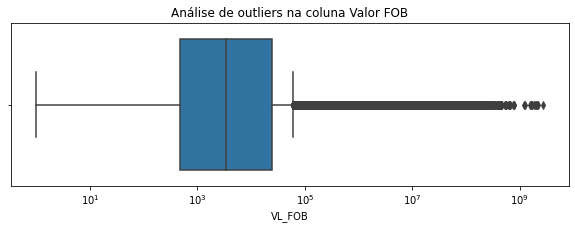

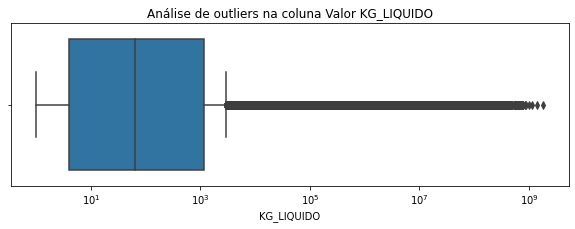

In [7]:
# Análise e tratamento de outliers
# Item 3.4 do TCC
#----------------

f = plt.figure(figsize=[10,3])
fig = sns.boxplot(data=df_imp_completa,x=df_imp_completa['VL_FOB'])
fig.set_xscale('log')
fig.set_title('Análise de outliers na coluna Valor FOB')
Q1=df_imp_completa['VL_FOB'].quantile(0.25)
Q3=df_imp_completa['VL_FOB'].quantile(0.75)
IQR=Q3-Q1
lim_inf = Q1 - 1.5 * IQR 
lim_sup = Q3 + 1.5 * IQR
print(f'Análise de outliers no dataset IMP_COMPLETA, coluna Valor FOB:')
print(f'Limites para outliers: inferior: {lim_inf}, superior: {lim_sup}')
print(f'Quartil 25%: {Q1}')

f = plt.figure(figsize=[10,3])
fig = sns.boxplot(data=df_imp_completa,x=df_imp_completa['KG_LIQUIDO'])
fig.set_xscale('log')
fig.set_title('Análise de outliers na coluna Valor KG_LIQUIDO')
Q1=df_imp_completa['KG_LIQUIDO'].quantile(0.25)
Q3=df_imp_completa['KG_LIQUIDO'].quantile(0.75)
IQR=Q3-Q1
lim_inf = Q1 - 1.5 * IQR 
lim_sup = Q3 + 1.5 * IQR
print(f'Análise de outliers no dataset IMP_COMPLETA, coluna Valor KG_LIQUIDO:')
print(f'Limites para outliers: inferior: {lim_inf}, superior: {lim_sup}')
print(f'Quartil 25%: {Q1}')


In [8]:
# Integração entre os datasets IMP_COMPLETA e DOLAR_MENSAL
# Atribui a cotação mensal do dólar a uma nova coluna no dataset IMP_COMPLETA
# Item 3.5 do TCC
# ---------------
df_imp_completa['VALOR_DOLAR']=0
for ano in df_imp_completa['CO_ANO'].unique():
    for mes in range (1,13):
        cotacao = df_dolar_mensal.loc[(df_dolar_mensal['CO_ANO'] == ano) & 
                                      (df_dolar_mensal['CO_MES'] == mes)]
        df_imp_completa['VALOR_DOLAR'][(df_imp_completa['CO_ANO'] == ano) & 
                                       (df_imp_completa['CO_MES'] == mes)] = cotacao['VALOR'].values[0]
              
            

In [9]:
# Estrutura final do dataset IMP_COMPLETA
# Item 3.6 do TCC
# ---------------
df_imp_completa.reset_index(inplace=True, drop=True)
print('Estrutura final do dataset IMP_COMPLETA, após as validações e modificações realizadas')
print(f'  Quantidade de linhas do dataset IMP_COMPLETA: {df_imp_completa.shape[0]}; '
      f'colunas: {df_imp_completa.shape[1]}')
df_imp_completa.head()


Estrutura final do dataset IMP_COMPLETA, após as validações e modificações realizadas
  Quantidade de linhas do dataset IMP_COMPLETA: 14636820; colunas: 10


,CO_ANO,CO_MES,CO_NCM,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,KG_LIQUIDO,VL_FOB,VALOR_DOLAR
0,2013,6,73079100,386,RJ,4,717700,35.0,20578.0,2.1724
1,2013,6,48119010,399,CE,4,317700,760.0,45740.0,2.1724
2,2013,6,73079200,275,PR,4,817700,5.0,218.0,2.1724
3,2013,6,85122022,493,SP,1,817800,104.0,8602.0,2.1724
4,2013,6,82041100,161,SC,1,927800,32.0,1564.0,2.1724


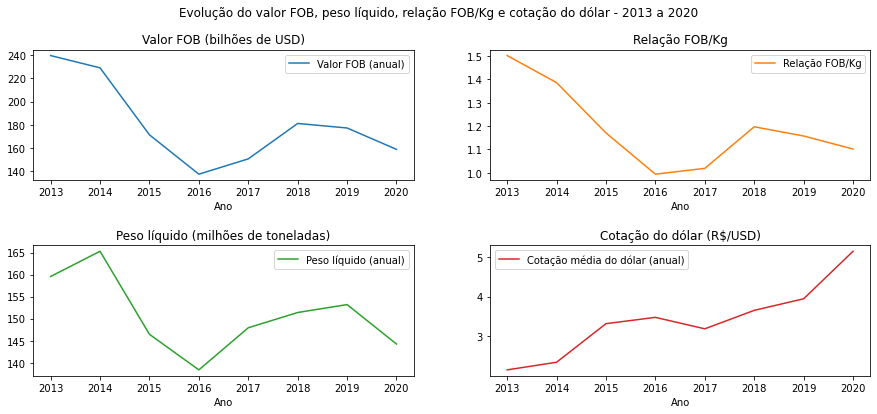

In [10]:
# Avaliação da evolução do valor FOB e do peso líquido das importações, por ano
# Comparação entre a relação FOB/KG e a cotação do dólar norte-americano
# Item 4.1 do TCC
#----------------

# Prepara o dataset contendo os valores agregados por ano
df_valores_anuais = df_imp_completa.groupby(['CO_ANO']).agg({'VL_FOB': ['sum'], 'KG_LIQUIDO': ['sum'], 
                            'VALOR_DOLAR': ['mean']}).sort_values(by=['CO_ANO'])
df_valores_anuais.columns=['Valor FOB (anual)','Peso líquido (anual)', 
                           'Cotação média do dólar (anual)']
df_valores_anuais['Relação FOB/Kg'] = ( df_valores_anuais['Valor FOB (anual)'] /
                                       df_valores_anuais['Peso líquido (anual)'] )
df_valores_anuais = df_valores_anuais[['Valor FOB (anual)','Relação FOB/Kg',
                                       'Peso líquido (anual)','Cotação média do dólar (anual)']]
titulo = (f'Evolução do valor FOB, peso líquido, relação FOB/Kg e '
         f'cotação do dólar - {df_valores_anuais.index.min()} a {df_valores_anuais.index.max()}')
df_valores_anuais['Valor FOB (anual)'] = df_valores_anuais['Valor FOB (anual)'] / 10**9
df_valores_anuais['Peso líquido (anual)'] = df_valores_anuais['Peso líquido (anual)'] / 10**9

# Plota o gráfico com os comparativos anuais
(ax1, ax2), (ax3,ax4) = df_valores_anuais.plot(subplots=True, layout=(2,2),figsize=(15, 6), 
                                               xlabel='Ano', title=titulo, sharex=False)
plt.subplots_adjust(hspace=0.5)
axz = ax1.set_title('Valor FOB (bilhões de USD)')
axz = ax3.set_title('Peso líquido (milhões de toneladas)')
axz = ax2.set_title('Relação FOB/Kg')
axz = ax4.set_title('Cotação do dólar (R$/USD)')


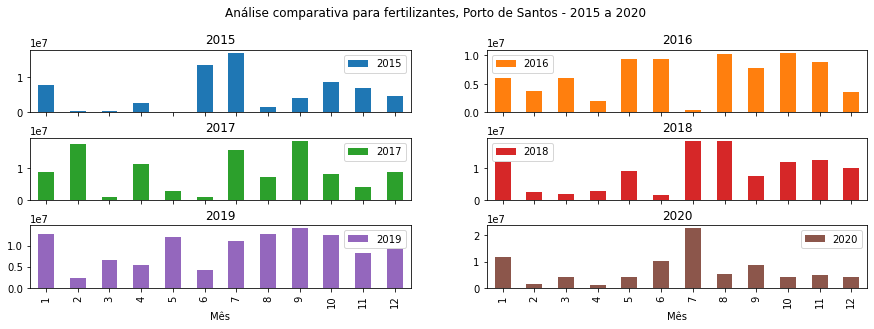

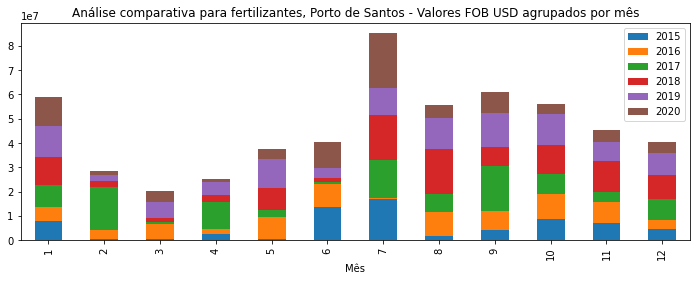

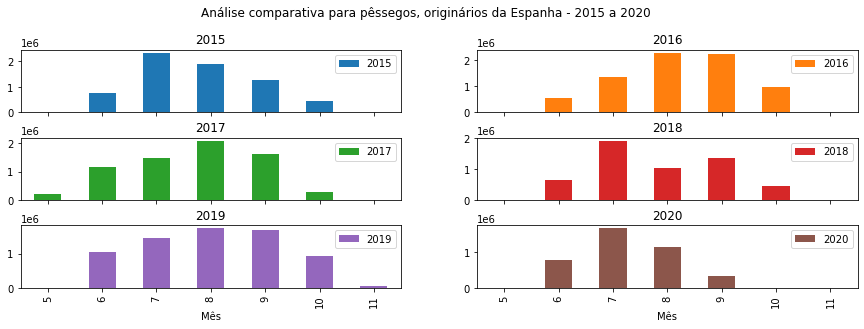

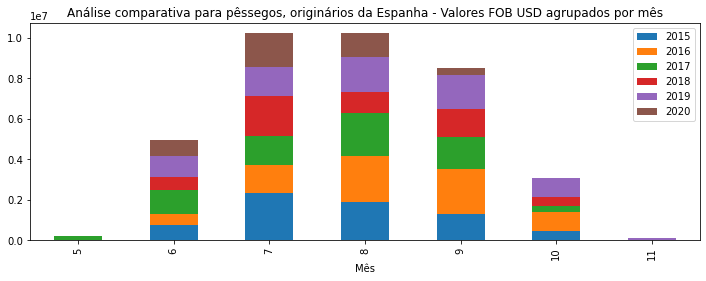

In [11]:
# Comparação entre alguns casos de sazonalidade nas importações
# Item 4.2 do TCC
# ---------------

def graficos_comparativos_sazonalidade (df_filtrado, titulo, ano_inicio, ano_fim):
    """ Função para realizar a comparação de sazonalidade de forma genérica
        Recebe como entrada o dataset contendo apenas as linhas de interesse,
          período (ano de início e fim) e título para o gráfico
        Plota os gráficos individualizados (por ano) e o acumulado de cada mês
    """
    ano = ano_inicio
    df_imp_ano = df_filtrado[df_filtrado['CO_ANO']==ano]
    df_soma_mes = df_imp_ano.groupby(['CO_MES']).agg({'VL_FOB': ['sum'] }).sort_values(by=['CO_MES'])
    df_soma_mes.columns=[ano]
    df_valores_mensais = df_soma_mes
    ano = ano +1
    while ano <= ano_fim:
        df_imp_ano = df_filtrado[df_filtrado['CO_ANO']==ano]
        df_soma_mes=df_imp_ano.groupby(['CO_MES']).agg({'VL_FOB':['sum'] }).sort_values(by=['CO_MES'])
        df_soma_mes.columns=[ano]
        df_valores_mensais = pd.concat([df_valores_mensais, df_soma_mes], axis=1)
        ano = ano +1

    # Plota gráficos para cada ano
    fig = df_valores_mensais.plot(kind='bar', subplots=True, layout=(4,2),figsize=(15, 6), 
                                  xlabel='Mês', title =f'{titulo} - {ano_inicio} a {ano_fim}')   
    plt.subplots_adjust(hspace=0.4)
    # Plota gráfico acumulado (em barras) para o volume, agrupado por mês
    fig = df_valores_mensais.plot.bar(stacked=True, figsize=(12,4), 
                                title=f'{titulo} - Valores FOB USD agrupados por mês', xlabel='Mês')


# Gráfico para NCM 31052000 (fertilizantes) com entrada pelo Porto de Santos (817800)
graficos_comparativos_sazonalidade (df_imp_completa[(df_imp_completa['CO_URF']==817800) & 
                                                    (df_imp_completa['CO_NCM']==31052000)],
                                    'Análise comparativa para fertilizantes, Porto de Santos', 
                                    ANALISES_ANO_INICIAL+2, ANALISES_ANO_FINAL)

# Gráfico para NCM 8093010 (pêssegos) originários da Espanha (245)
graficos_comparativos_sazonalidade (df_imp_completa[(df_imp_completa['CO_NCM']==8093010) & 
                                                    (df_imp_completa['CO_PAIS']==245)], 
                                    'Análise comparativa para pêssegos, originários da Espanha', 
                                    ANALISES_ANO_INICIAL+2, ANALISES_ANO_FINAL)



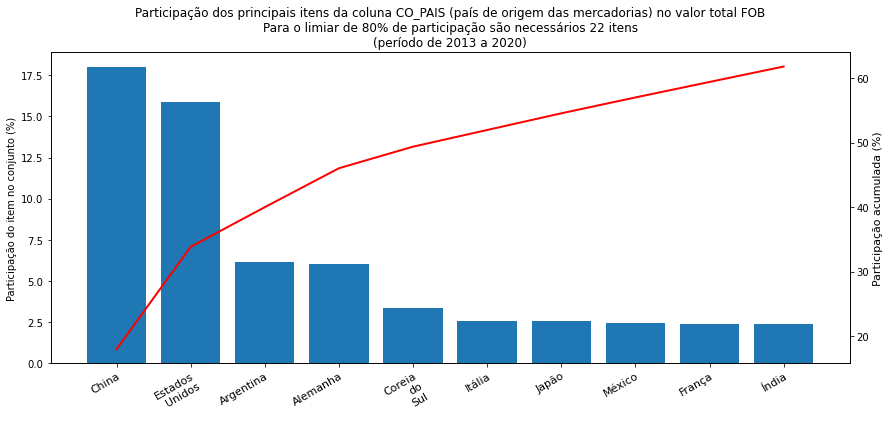

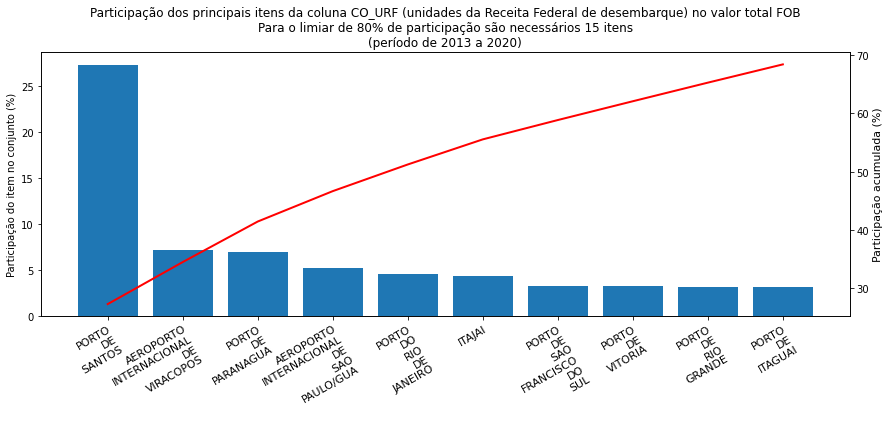

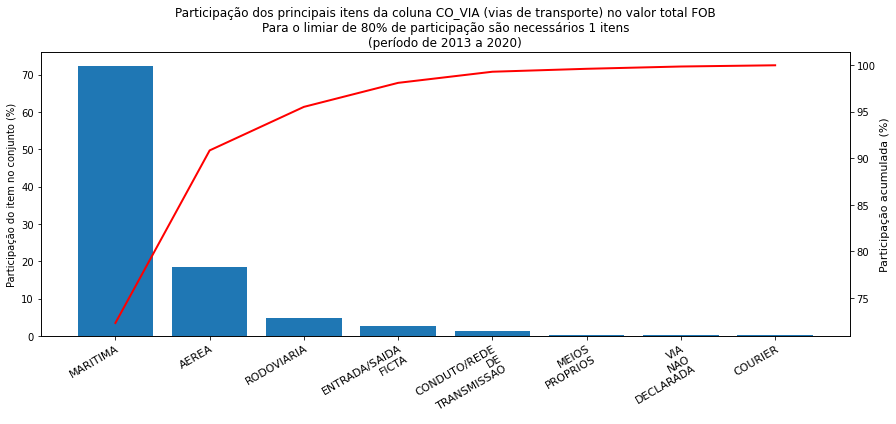

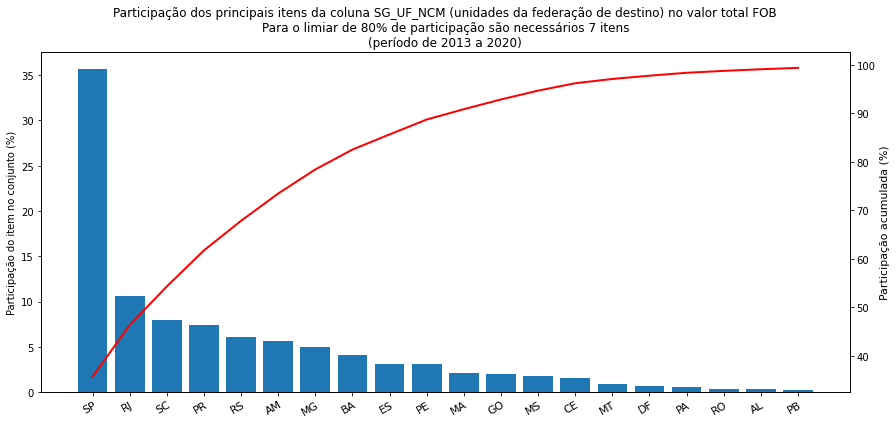

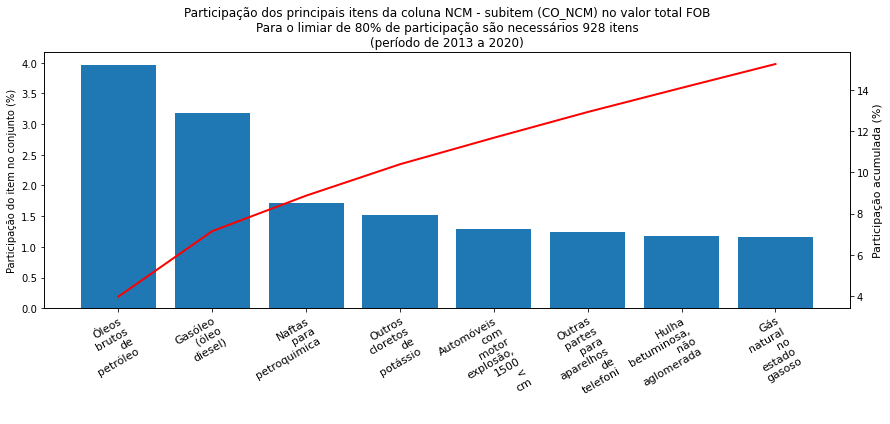

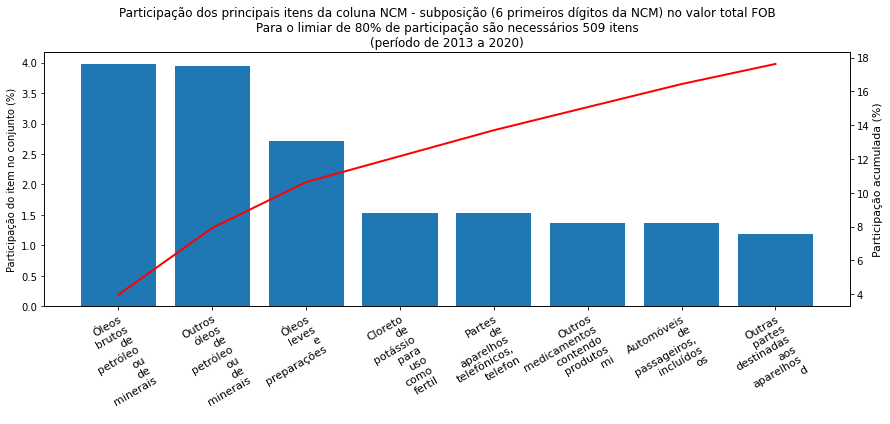

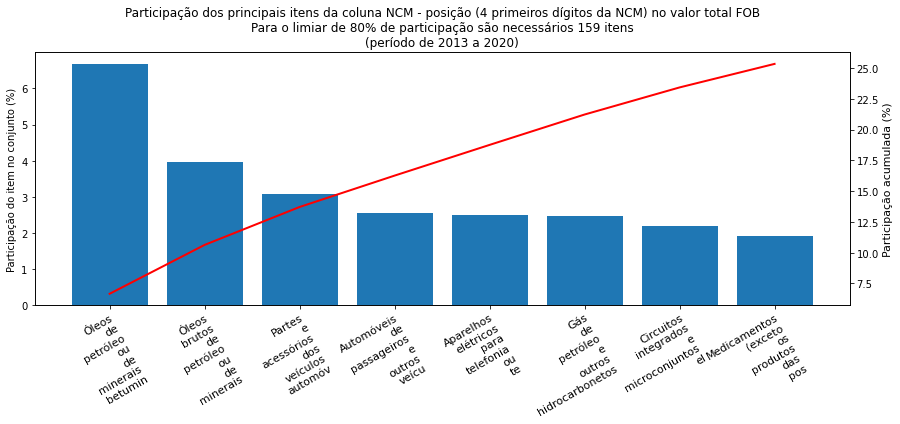

In [12]:
# Análise da participação (percentual do FOB total) dos itens de cada coluna de IMP_COMPLETA
# (país de origem, via de transporte, unidade desembarque, unidade da federação, NCM)
# Calcula quantos itens são necessários para se atingir um mínimo percentual de cobertura
# Item 4.3 do TCC
# ---------------


# Limiares iniciais para estudo da participação dos itens em cada coluna
LIMIAR_PAISES = 80
LIMIAR_URF = 80
LIMIAR_VIA = 80
LIMIAR_UF = 80
LIMIAR_NCM = 80

# Prepara colunas nos datasets para os códigos de NCM com 6 dígitos (subposição) e 4 dígitos (posição)
df_imp_completa['NCM_6'] = df_imp_completa['CO_NCM'].astype(str).str.zfill(8).str[0:6]
df_imp_completa['NCM_4'] = df_imp_completa['CO_NCM'].astype(str).str.zfill(8).str[0:4]
df_orig_ncm_sh['CO_SH6_STR'] = df_orig_ncm_sh['CO_SH6'].astype(str).str.zfill(6).str[0:6]
df_orig_ncm_sh['CO_SH4_STR'] = df_orig_ncm_sh['CO_SH4'].astype(str).str.zfill(4).str[0:4]
df_ncm_sh_4 = df_orig_ncm_sh[['CO_SH4_STR','NO_SH4_POR']]
df_ncm_sh_4 = df_ncm_sh_4.groupby(['CO_SH4_STR','NO_SH4_POR']).size().reset_index().rename(columns={0:'count'})

def analise_participacao_acumulada (df_param, limiar, s_nome_da_categoria, df_nomes, 
                                    plotar=False, itens_grafico=8):
    """ Função para calcular as participações e encontrar a quantidade de itens para atingir o limiar
        Plota o gráfico de participação de cada item no conjunto e da participação acumulada
        Recebe como parâmetro o dataframe com os valores (df_param) e os nomes dos itens (df_nomes),
          além do limiar desejado e parâmetros para o gráfico, de forma a
          permitir a utilização da função de forma genérica para diferentes tipos de análise
    """
    df_param.columns = ['valores']
    df_param = df_param.sort_values(by=['valores'], ascending=False)
    total = df_param.sum().values[0]
    df_param['Participacao Acumulada'] = 100 * (df_param.cumsum()/df_param.sum())
    df_param['eixo_x'] = np.arange(0,df_param.shape[0])
    df_param['Participacao Individual'] = 100 * (df_param['valores']/total)
    df_param = df_param.reset_index()
    df_param.columns = ['Item da classe', 'valores','Participacao Acumulada','eixo_x', 
                        'Participacao Individual' ]
    df_limiar = df_param[df_param['Participacao Acumulada']<=limiar]
    pontos = df_limiar.shape[0]
    
    # Plota gráfico da participação de cada item no total, assim como a participação acumulada
    if plotar:
        fig = plt.figure(figsize=(12,6))
        qtd_it = pd.Series([itens_grafico,df_param.shape[0]]).min()
        i_item = 0
        y_lb = []
        df_nomes.columns=['codigo','nome']
        for p in np.arange(0,qtd_it):
            item_classe = df_param['Item da classe'][i_item]
            nome_item = df_nomes['nome'].loc[df_nomes['codigo'] == item_classe].values[0]
            nome_item = nome_item[:40]
            y_lb.append(nome_item)
            i_item = i_item +1
   
        plt.bar([ label.replace(' ', '\n') for label in y_lb ],
                df_param['Participacao Individual'].head(qtd_it))
        plt.ylabel ( 'Participação do item no conjunto (%)'  )
        plt.xticks(rotation=30, ha="right", va='top', fontsize=11, wrap=True)
        titulo = (f'Participação dos principais itens da coluna {s_nome_da_categoria} '
                f'no valor total FOB\n')
        titulo=titulo + f'Para o limiar de {limiar}% de participação são necessários {pontos} itens\n'
        titulo=titulo + f'(período de {ANALISES_ANO_INICIAL} a {ANALISES_ANO_FINAL})'
        plt.title(titulo)
        plt.tight_layout()
        ax2 = plt.twinx()
        ax2.spines['right'].set_position(('axes', 1.0))
        ax2.set_ylabel(ylabel='Participação acumulada (%)', fontsize=11)
        df_param['Participacao Acumulada'].head(itens_grafico).plot(ax=ax2, color='r', linewidth='2')

    # retorna o dataframe df_limiar (que contém apenas os itens dentro do limiar)
    #  e o dataframe df_param, que contém todos os itens da categoria
    return df_limiar, df_param


# Compara as participações dos países no valor FOB total de importações
# Item 4.3.1 do TCC
# -----------------
df_red_pais, df_comp_pais = analise_participacao_acumulada ( 
    df_imp_completa.groupby(['CO_PAIS']).agg({'VL_FOB': ['sum']}) , 
    LIMIAR_PAISES, 'CO_PAIS (país de origem das mercadorias)', 
    df_orig_pais[['CO_PAIS','NO_PAIS']], True,10)

# Compara as participações das unidades da RFB de desembarque no valor FOB total de importações
# Item 4.3.2 do TCC
# -----------------
df_orig_urf['NO_URF_nome'] = df_orig_urf['NO_URF'].str.split('- ').str[1]
df_red_urf, df_comp_urf = analise_participacao_acumulada ( 
    df_imp_completa.groupby(['CO_URF']).agg({'VL_FOB': ['sum']}) , 
    LIMIAR_URF, 'CO_URF (unidades da Receita Federal de desembarque)', 
    df_orig_urf[['CO_URF','NO_URF_nome']], True,10)

# Compara as participações das vias de transporte no valor FOB total de importações
# Item 4.3.3 do TCC
# -----------------
df_red_via, df_comp_via = analise_participacao_acumulada ( 
    df_imp_completa.groupby(['CO_VIA']).agg({'VL_FOB': ['sum']}) , 
    LIMIAR_VIA, 'CO_VIA (vias de transporte)', df_orig_via[['CO_VIA','NO_VIA']], True,8)

# Compara as participações das unidades da federação de destino no valor FOB total de importações
# Item 4.3.4 do TCC
# -----------------
df_red_uf, df_comp_uf = analise_participacao_acumulada ( 
    df_imp_completa.groupby(['SG_UF_NCM']).agg({'VL_FOB': ['sum']}) , 
    LIMIAR_UF, 'SG_UF_NCM (unidades da federação de destino)', 
    df_orig_uf[['SG_UF','SG_UF']], True,20)


# Compara as participações dos tipos de mercadoria no valor FOB total de importações
#  considera NCM representada por subitem (8 dígitos), subposição (6 dígitos) e posição (4 dígitos)
# Item 4.3.5 do TCC
# -----------------
df_red_ncm, df_comp_ncm = analise_participacao_acumulada ( 
    df_imp_completa.groupby(['CO_NCM']).agg({'VL_FOB': ['sum']}) , 
    LIMIAR_NCM, 'NCM - subitem (CO_NCM)', df_orig_ncm[['CO_NCM','NO_NCM_POR']], True, 8)

df_red_ncm_6, df_comp_ncm_6 = analise_participacao_acumulada ( 
    df_imp_completa.groupby(['NCM_6']).agg({'VL_FOB': ['sum']}) , 
    LIMIAR_NCM, 'NCM - subposição (6 primeiros dígitos da NCM)', 
    df_orig_ncm_sh[['CO_SH6_STR','NO_SH6_POR']], True, 8)

df_red_ncm_4, df_comp_ncm_4 = analise_participacao_acumulada ( 
    df_imp_completa.groupby(['NCM_4']).agg({'VL_FOB': ['sum']}) , 
    LIMIAR_NCM, 'NCM - posição (4 primeiros dígitos da NCM)', 
    df_orig_ncm_sh[['CO_SH4_STR','NO_SH4_POR']], True, 8)


# Armazena as listas de itens para o processamento do dataset 
#  (para a primeira fase de montagem do modelo preditivo - p1)
#  (baseado no limiar de 80% de participação das variáveis)
p1_lista_modelo = Lista_Param_Modelo()
# Lista com os itens para atingir o limiar de 80%
p1_lista_modelo.l_co_pais = list(df_red_pais['Item da classe'])
p1_lista_modelo.l_co_urf = list(df_red_urf['Item da classe'])
p1_lista_modelo.l_co_via = list(df_red_via['Item da classe'])
p1_lista_modelo.l_sg_uf_ncm = list(df_red_uf['Item da classe'])
if 'ND' in p1_lista_modelo.l_sg_uf_ncm: p1_lista_modelo.l_sg_uf_ncm.remove('ND')
if 'EX' in p1_lista_modelo.l_sg_uf_ncm: p1_lista_modelo.l_sg_uf_ncm.remove('EX')
if 'ZN' in p1_lista_modelo.l_sg_uf_ncm: p1_lista_modelo.l_sg_uf_ncm.remove('ZN')
p1_lista_modelo.l_ncm_6 = list(df_red_ncm_6['Item da classe'])
p1_lista_modelo.l_ncm_4 = list(df_red_ncm_4['Item da classe'])
p1_lista_modelo.l_ncm = list(df_red_ncm['Item da classe'])
# Lista completa dos itens, para testes do modelo
p1_lista_modelo.l_completa_co_pais = list(df_comp_pais['Item da classe'])
p1_lista_modelo.l_completa_co_urf = list(df_comp_urf['Item da classe'])
p1_lista_modelo.l_completa_co_via = list(df_comp_via['Item da classe'])
p1_lista_modelo.l_completa_sg_uf_ncm = list(df_comp_uf['Item da classe'])
if 'ND' in p1_lista_modelo.l_completa_sg_uf_ncm: p1_lista_modelo.l_completa_sg_uf_ncm.remove('ND')
if 'EX' in p1_lista_modelo.l_completa_sg_uf_ncm: p1_lista_modelo.l_completa_sg_uf_ncm.remove('EX')
if 'ZN' in p1_lista_modelo.l_completa_sg_uf_ncm: p1_lista_modelo.l_completa_sg_uf_ncm.remove('ZN')
p1_lista_modelo.l_completa_ncm_6 = list(df_comp_ncm_6['Item da classe'])
p1_lista_modelo.l_completa_ncm_4 = list(df_comp_ncm_4['Item da classe'])
p1_lista_modelo.l_completa_ncm = list(df_comp_ncm['Item da classe'])
p1_lista_modelo.lista_principais_unidades_RFB = [817800, 817700, 917800, 817600, 717600, 927800, 
                                                 927700, 727600, 1017700, 717800, 227600, 812051, 
                                                 227700, 417800, 327600]


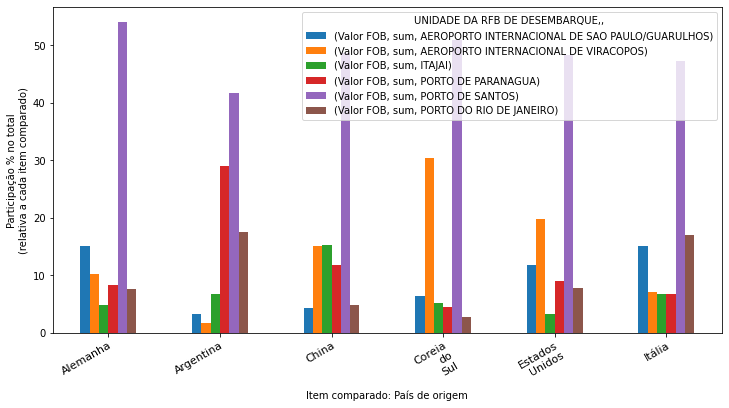

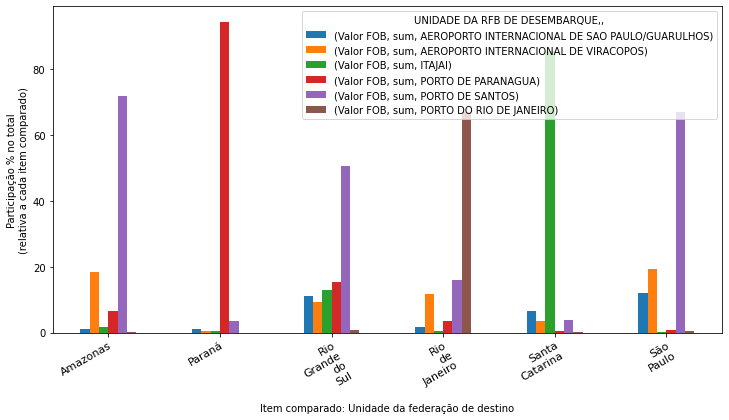

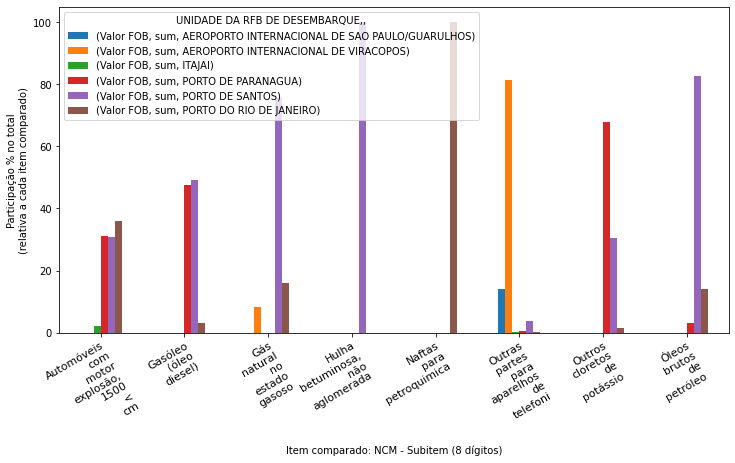

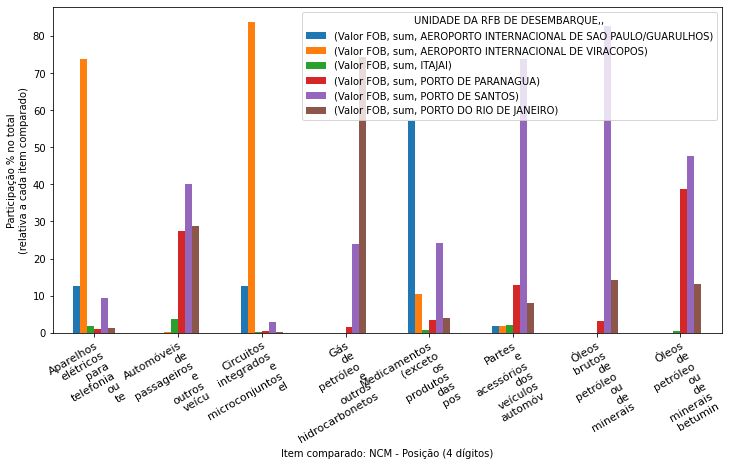

In [13]:
# Analisa a influência das variáveis do modelo (país de origem, unidade da federação, NCM, etc)
# no comportamento da variável-alvo (unidade de desembarque das mercadorias - CO_URF)
# ITEM 4.4 do TCC
# ---------------

def analisa_relacao_colunas (df_lista,df_nomes_lista,df_nomes_barras,titulo_itens,titulo_barras):
    """ Função para plotar gráfico de relação entre duas colunas de interesse no dataset,
        fazendo a comparação da participação de cada item em relação ao valor FOB total
    """
    df_nomes_lista.columns=['codigo','nome']
    df_lista['ITENS'] = df_lista['ITENS'].map(df_nomes_lista.set_index('codigo')['nome'])
    df_lista['ITENS'] = df_lista['ITENS'].str.replace(' ','\n')
    df_lista['ITENS'] = df_lista['ITENS'].str[0:40]
    df_nomes_barras.columns=['codigo','nome']
    df_lista['BARRAS'] = df_lista['BARRAS'].map(df_nomes_barras.set_index('codigo')['nome'])
    df_lista = df_lista.rename({'VL_FOB': 'Valor FOB'}, axis=1)
    df_gr_totais = df_lista.groupby(['ITENS','BARRAS']).agg({'Valor FOB': ['sum']})
    df_gr_totais = df_gr_totais.unstack()
    somas_paises = df_gr_totais.sum(axis=1) / 100
    df_gr_totais = df_gr_totais.iloc[:,:].div(somas_paises, axis=0)

    df_gr_totais.columns.names = [titulo_itens,'','']
    
    ax = df_gr_totais.plot(kind='bar',figsize=(12,6), xlabel=f'Item comparado: {titulo_barras}', 
                           ylabel = 'Participação % no total\n(relativa a cada item comparado)');
    plt.xticks(rotation=30, ha="right", va='top', fontsize=11, wrap=True);
    
    
# Avalia as relações entre os itens mais importantes das colunas PAIS DE ORIGEM e UNIDADE DA RFB
# ITEM 4.4.1 do TCC
# -----------------
df_relacao = df_imp_completa[(df_imp_completa['CO_PAIS'].isin(p1_lista_modelo.l_co_pais[:6])) & 
                             (df_imp_completa['CO_URF'].isin(p1_lista_modelo.l_co_urf[:6]))]
df_relacao = df_relacao.rename({'CO_PAIS': 'ITENS', 'CO_URF': 'BARRAS'}, axis=1)
analisa_relacao_colunas (df_relacao, df_orig_pais[['CO_PAIS','NO_PAIS']], 
                         df_orig_urf[['CO_URF','NO_URF_nome']],
                        'UNIDADE DA RFB DE DESEMBARQUE', 'País de origem')


# Avalia as relações entre itens das colunas UNIDADE DA FEDERAÇÃO DESTINO e UNIDADE DA RFB
# ITEM 4.4.2 do TCC
# -----------------
df_relacao = df_imp_completa[(df_imp_completa['SG_UF_NCM'].isin(p1_lista_modelo.l_sg_uf_ncm[:6])) & 
                             (df_imp_completa['CO_URF'].isin(p1_lista_modelo.l_co_urf[:6]))]
df_relacao = df_relacao.rename({'SG_UF_NCM': 'ITENS', 'CO_URF': 'BARRAS'}, axis=1)
analisa_relacao_colunas (df_relacao, df_orig_uf[['SG_UF','NO_UF']], 
                         df_orig_urf[['CO_URF','NO_URF_nome']],
                        'UNIDADE DA RFB DE DESEMBARQUE', 'Unidade da federação de destino')


# Avalia as relações entre os itens das colunas NCM (subitem, 8 dígitos) e UNIDADE DA RFB
# ITEM 4.4.3 do TCC
# -----------------
df_relacao = df_imp_completa[(df_imp_completa['CO_NCM'].isin(p1_lista_modelo.l_ncm[:8])) & 
                             (df_imp_completa['CO_URF'].isin(p1_lista_modelo.l_co_urf[:6]))]
df_relacao = df_relacao.rename({'CO_NCM': 'ITENS', 'CO_URF': 'BARRAS'}, axis=1)
analisa_relacao_colunas (df_relacao, df_orig_ncm[['CO_NCM','NO_NCM_POR']], 
                         df_orig_urf[['CO_URF','NO_URF_nome']],
                        'UNIDADE DA RFB DE DESEMBARQUE', 'NCM - Subitem (8 dígitos)')


# Avalia as relações entre os itens mais importantes das colunas NCM (posição, 4 dígitos) e UNIDADE DA RFB
# ITEM 4.4.3 do TCC
# -----------------
df_relacao = df_imp_completa[(df_imp_completa['NCM_4'].isin(p1_lista_modelo.l_ncm_4[:8])) & 
                             (df_imp_completa['CO_URF'].isin(p1_lista_modelo.l_co_urf[:6]))]
df_relacao = df_relacao.rename({'NCM_4': 'ITENS', 'CO_URF': 'BARRAS'}, axis=1)
analisa_relacao_colunas (df_relacao, df_ncm_sh_4[['CO_SH4_STR','NO_SH4_POR']], 
                         df_orig_urf[['CO_URF','NO_URF_nome']],
                        'UNIDADE DA RFB DE DESEMBARQUE', 'NCM - Posição (4 dígitos)')

del df_relacao

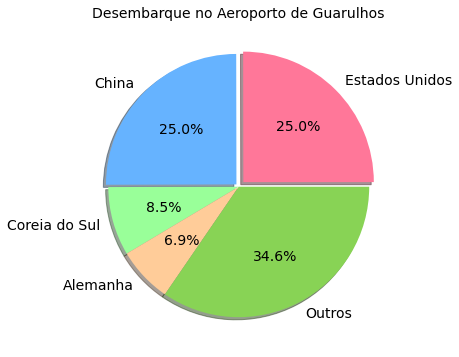

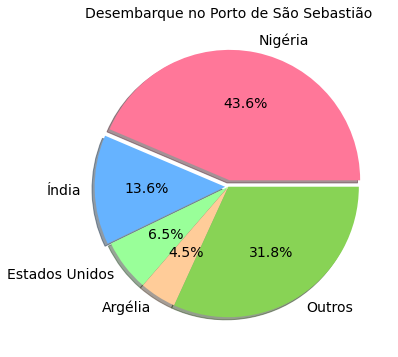

In [14]:
# Comparativo entre diferentes locais de desembarque, em função do país de origem
# ITEM 4.4.1 do TCC
# ---------------

def plota_pie_chart_itens(df_relacao, n_itens, titulo):
    """ Função para plotar gráfico "pie-chart" para comparação entre dois locais de desembarque
    """
    df_princ_paises, df_todos_paises = analise_participacao_acumulada ( 
            df_relacao.groupby(['CO_PAIS']).agg({'VL_FOB': ['sum']}) , 
            LIMIAR_PAISES, 'CO_PAIS (país de origem das mercadorias)', 
            df_orig_pais[['CO_PAIS','NO_PAIS']], False,10)

    df_nomes_lista = df_orig_pais[['CO_PAIS','NO_PAIS']]
    df_nomes_lista.columns=['codigo','nome']
    df_todos_paises['Item da classe'] = df_todos_paises['Item da classe'].map(df_nomes_lista.set_index('codigo')['nome'])
    df_todos_paises = df_todos_paises.head(n_itens)
    total_outros = 100 - df_todos_paises['Participacao Individual'].sum()
    df_todos_paises.drop(['Participacao Acumulada','valores','eixo_x'], inplace=True, axis=1)
    df_todos_paises.loc[df_todos_paises.shape[0]] = ['Outros',total_outros]
    df_todos_paises.set_index('Item da classe',inplace=True)

    expl = [0] * (n_itens+1)
    expl[0] = 0.05
    expl[1] = 0.025
    cores = ['#ff7799','#66b3ff','#99ff99','#ffcc99','#88d355']
    ax = df_todos_paises.plot(kind='pie',y='Participacao Individual', x="Item da classe",
                              autopct='%1.1f%%', colors=cores, figsize=(6, 6),  shadow=True, 
                              startangle=0, fontsize=14, legend=False, explode=expl)
    ax.set_ylabel('')
    ax.set_title(titulo,fontsize= 14)

# Compara o Aeroporto de Guarulhos e o Porto de São Sebastião em relação ao país de origem
plota_pie_chart_itens( df_imp_completa[(df_imp_completa['CO_URF']==817700)],4,
                      'Desembarque no Aeroporto de Guarulhos')
plota_pie_chart_itens( df_imp_completa[(df_imp_completa['CO_URF']==812051)],4,
                      'Desembarque no Porto de São Sebastião')


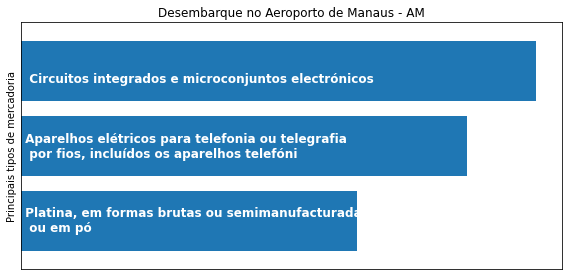

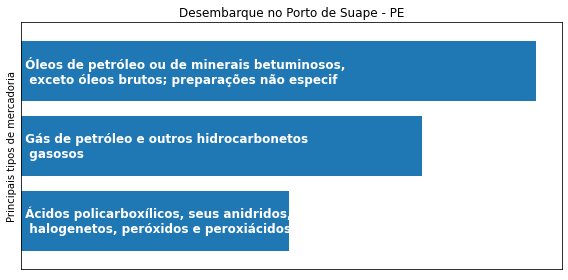

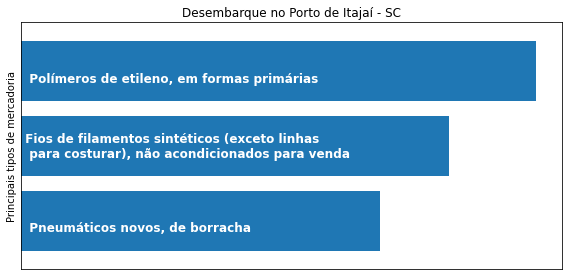

In [15]:
# Comparativo entre tipos de mercadorias em algumas unidades de desembarque
# ITEM 4.4.3 do TCC
# ---------------

def plota_tipos_mercadorias(df_relacao, n_itens, titulo):
    """ Função para plotar gráfico dos tipos de mercadoria (NCM - posição 4 dígitos)
            que predominam em um determinado local de desembarque
    """    
    df_nomes_lista = df_ncm_sh_4[['CO_SH4_STR','NO_SH4_POR']]
    df_princ_ncm, df_todas_ncm = analise_participacao_acumulada ( 
        df_relacao.groupby(['NCM_4']).agg({'VL_FOB': ['sum']}) , 
        LIMIAR_NCM, 'NCM', df_nomes_lista, False, 8)
    df_nomes_lista.columns=['codigo','nome']
    df_todas_ncm['Item da classe'] = df_todas_ncm['Item da classe'].map(df_nomes_lista.set_index('codigo')['nome'])
    df_todas_ncm = df_todas_ncm.head(n_itens)
    df_todas_ncm.drop(['Participacao Acumulada','valores','eixo_x'], 
                      inplace=True, axis=1)

    df_todas_ncm.rename(columns = {'Item da classe': 'Principais tipos de mercadoria'},
                        inplace=True)
    df_todas_ncm.set_index('Principais tipos de mercadoria',inplace=True)
    df_todas_ncm["Participacao Individual"] = np.log10(df_todas_ncm["Participacao Individual"]+1)
    ax = df_todas_ncm.plot(kind="barh", legend=False, width=0.8, figsize=(8,4), title = titulo)
    for i, (p, pr) in enumerate(zip(df_todas_ncm.index, df_todas_ncm["Participacao Individual"])):
        posi_esp = p.find(' ',40,60)+1
        p = p[0:posi_esp] + '\n  ' + p[posi_esp:90]
        plt.text(s=' ' + p, x=0, y=i, color="w", verticalalignment="center", size=12,
                 horizontalalignment="left", fontweight = 'bold')
        
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    ax.invert_yaxis()

# Compara algumas unidades de desembarque em relação aos tipos de mercadoria predominantes
plota_tipos_mercadorias( df_imp_completa[(df_imp_completa['CO_URF']==227700)],3,
                        'Desembarque no Aeroporto de Manaus - AM')
plota_tipos_mercadorias( df_imp_completa[(df_imp_completa['CO_URF']==417800)],3,
                        'Desembarque no Porto de Suape - PE')
plota_tipos_mercadorias( df_imp_completa[(df_imp_completa['CO_URF']==927800)],3,
                        'Desembarque no Porto de Itajaí - SC')

In [16]:

# Prepara o dataset base para o modelo de aprendizado de máquina
# Item 4.5 do TCC
# ---------------

if UTILIZAR_DATASET_BASE_PRE_GRAVADO:
    if CARREGAR_DATASETS_DO_REPOSITORIO_NUVEM:
        df_base = pd.read_csv('https://raw.githubusercontent.com/rogmac/TCC/main/datasets/DF_BASE.csv',
                              sep=';', encoding='latin1')
    else:
        df_base = pd.read_csv(filepath_or_buffer=CAMINHO_DATASET_BASE_LOCAL,sep=';')
else:
    # Seleciona o período (ano inicial/final) para o dataset que alimentará o modelo preditivo
    df_imp_completa = df_imp_completa[(df_imp_completa['CO_ANO'] >= MODELO_ANO_INICIAL) & 
                                      (df_imp_completa['CO_ANO'] <= MODELO_ANO_FINAL)]

    # Seleciona amostras aleatórias, que vão formar o dataset de base para os modelos
    np.random.seed(i_SEED)
    indices = np.random.choice(df_imp_completa.shape[0], replace = False, 
                               size=AMOSTRAS_DATASET_BASE_PRE_GRAVADO)
    df_base = df_imp_completa.iloc[indices]

    if GRAVAR_DATASET_BASE:
        df_base.to_csv(CAMINHO_DATASET_BASE_LOCAL, sep=';', index=False)

In [17]:
# Funções desenvolvidas para testes do modelo Decision Tree em diferentes condições
# Item 5.4 do TCC
# ---------------

def intervalo_acc(results, imprimir=False):
    """ Função para calcular a acurácia (média e intervalo) considerando um conjunto
        de testes que foram realizados pela função cross_val_score (validação cruzada)
        A função retorna a média das acurácias dos testes
    """
    media = results.mean()
    dv = results.std()
    if imprimir:
        s_info = 'Validação cruzada: Acurácia média: {:.2f}%'.format(media*100)
        s_info = s_info + ' -- Intervalo: [{:.2f}% ~ {:.2f}%]'.format((media - 2*dv)*100, 
                                                                      (media + 2*dv)*100)
        print(s_info)
    return media, dv

def processa_modelos_DT ( df_imp_reclas, p_mod: Lista_Param_Modelo, comentario=''):
    """ Função para realizar testes com o modelo preditivo Decision Tree
        Os diversos parâmetros (que fazem parte da classe Lista_Modelo) definem as 
          diversas opções de montagem do dataset e do modelo para avaliação dos resultados
    """
    # Seleciona amostras aleatórias a partir do dataset geral
    np.random.seed(i_SEED)
    indices = np.random.choice(df_imp_reclas.shape[0], replace = False, size=p_mod.qtd_amostras)
    df_imp_reclas = df_imp_reclas.iloc[indices]

    # Reclassifica os itens de menor relevância (na participação estatística) para "outros"
    df_imp_reclas.loc[~df_imp_reclas['CO_URF'].isin(p_mod.l_co_urf), 'CO_URF'] = 'OUTRAS_URF'
    df_imp_reclas.loc[~df_imp_reclas['CO_PAIS'].isin(p_mod.l_co_pais), 'CO_PAIS'] = 'OUTROS_PAISES'
    df_imp_reclas.loc[~df_imp_reclas['CO_VIA'].isin(p_mod.l_co_via), 'CO_VIA'] = 'OUTRAS_VIAS'
    df_imp_reclas.loc[~df_imp_reclas['SG_UF_NCM'].isin(p_mod.l_sg_uf_ncm), 'SG_UF_NCM'] = 'OUTRAS_UF'
    df_imp_reclas.loc[~df_imp_reclas['NCM_6'].isin(p_mod.l_ncm_6), 'NCM_6'] = 'OUTRAS_NCM_6'
    df_imp_reclas.loc[~df_imp_reclas['NCM_4'].isin(p_mod.l_ncm_4), 'NCM_4'] = 'OUTRAS_NCM_4'
    df_imp_reclas.loc[~df_imp_reclas['CO_NCM'].isin(p_mod.l_ncm), 'CO_NCM'] = 'OUTRAS_NCM'
    
    # ajusta os nomes das colunas e remove aquelas que não serão utilizadas no modelo
    if p_mod.opcao_NCM == 8: df_imp_reclas['NCM_MOD'] = df_imp_reclas['CO_NCM']
    elif p_mod.opcao_NCM == 6: df_imp_reclas['NCM_MOD'] = df_imp_reclas['NCM_6']
    else: df_imp_reclas['NCM_MOD'] = df_imp_reclas['NCM_4']
    df_imp_reclas = df_imp_reclas.drop(['CO_ANO', 'CO_NCM','NCM_6', 'NCM_4'], axis=1)
   
    # Prepara os dataframes de treinamento e teste, criando as colunas "dummies"
    df_m_dum = pd.get_dummies(df_imp_reclas, columns=['CO_MES', 'CO_PAIS','SG_UF_NCM',
                                                      'CO_VIA','NCM_MOD','CO_URF'], 
                         prefix=['CO_MES', 'CO_PAIS','SG_UF_NCM','CO_VIA','NCM_MOD','CO_URF'])

    # Imprime parâmetros, caso desejado  
    if (p_mod.imprimir_parametros | p_mod.imprimir_resultados):
        print(f'Teste do modelo DecisionTree - versão {p_mod.versao} ({comentario})')
    if p_mod.imprimir_parametros:
        print(f'     Itens para cada coluna: CO_PAIS: {len(p_mod.l_co_pais)}, '
              f'CO_URF: {len(p_mod.l_co_urf)}, CO_VIA: {len(p_mod.l_co_via)}, '
              f'SG_UF_NCM: {len(p_mod.l_sg_uf_ncm)}')
        if p_mod.opcao_NCM == 8: print(f'     Quantidade de NCM (subitem 8 dígitos): {len(p_mod.l_ncm)}')
        elif p_mod.opcao_NCM == 6: print(f'     Quantidade de NCM '
                                         f'(subposição 6 dígitos): {len(p_mod.l_ncm_6)}')
        else: print(f'     Quantidade de NCM (posição 4 dígitos): {len(p_mod.l_ncm_4)}')
        print(f'     Quantidade amostras: {p_mod.qtd_amostras}, Proporção teste: {p_mod.proporcao_teste}')
        print(f'     Quantidade de colunas do dataset (incluindo dummies): {df_m_dum.shape[1]}')
    
    # Separa as colunas que fazem parte de X (variáveis do modelo) e y (variável alvo)
    #   X contém todas as variáveis, menos a variável-alvo; y contém as colunas da variável-alvo
    df_X = df_m_dum[df_m_dum.columns[~pd.Series(df_m_dum.columns).str.startswith('CO_URF')]]
    df_y = df_m_dum[df_m_dum.columns[pd.Series(df_m_dum.columns).str.startswith('CO_URF')]]

    # Prepara o conjunto de treinamento e o conjunto de teste
    X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(df_X, df_y, 
                                        test_size = p_mod.proporcao_teste, random_state = i_SEED)

    # Inicializa o modelo preditivo a ser testado
    ml_modelo = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth = 5, 
                                       min_samples_split = 2, random_state = i_SEED)

    if p_mod.otimizar_com_grid_search:
        # otimiza o modelo antes
        param_dict = { 'criterion':['gini','entropy'], 'max_depth':range(1,10), 
                      'min_samples_split':range(1,10), 'min_samples_leaf':range(1,5) }
        grid = GridSearchCV (ml_modelo, param_grid=param_dict, cv=10, verbose=0, n_jobs=-1)
        grid.fit(X_treinamento, y_treinamento)
        print(f'      Resultado GridSearchCV: {grid.best_params_}')
        ml_modelo = grid.best_estimator_

    # Prepara a validação cruzada
    np.random.seed(i_SEED)
    cv = KFold(n_splits = 5, shuffle = True)
    results = cross_val_score(ml_modelo, X_treinamento, y_treinamento, cv = cv, scoring = 'accuracy')
    acc_media_cross_val, acc_dv_cross_val = intervalo_acc(results, p_mod.imprimir_resultados)

    # Roda o modelo preditivo com os dados de teste
    start_time = time.time()
    ml_modelo.fit(X_treinamento, y_treinamento)
    total_time = time.time() - start_time
    y_pred = ml_modelo.predict(X_teste)

    # Avalia os resultados
    linhas_corretas = y_teste.eq(y_pred).all(axis=1).sum()
    total_linhas = y_pred.shape[0]
    percentual = 100*(linhas_corretas/total_linhas)
   
    if p_mod.imprimir_resultados:
        print(f'Predição sobre amostras de teste: {linhas_corretas} acertos em {total_linhas} '
              f'({percentual:.2f}%) (treinamento com {X_treinamento.shape[0]})')
        print(f'Tempo para treinamento: {1000 * total_time:.3f} ms')

    return acc_media_cross_val, ml_modelo


In [18]:
# Teste do modelo preditivo Decision Tree - Versão 1.1.1
# considera a quantidade de itens para cada variável de forma a atingir 80% de participação no valor total
# (dados obtidos na execução do item 4.3)
# Item 5.4.1 do TCC
# -----------------

p1_lista_modelo.l_co_urf = p1_lista_modelo.lista_principais_unidades_RFB
param = deepcopy(p1_lista_modelo)
df_temp = df_base.copy()
param.versao = '1.1.1'
param.opcao_NCM = 8
param.imprimir_parametros = True
param.imprimir_resultados = True
acc_media_cross = processa_modelos_DT (df_temp, param, 'parâmetros obtidos no item 4.3 do TCC' )


Teste do modelo DecisionTree - versão 1.1.1 (parâmetros obtidos no item 4.3 do TCC)
     Itens para cada coluna: CO_PAIS: 22, CO_URF: 15, CO_VIA: 1, SG_UF_NCM: 7
     Quantidade de NCM (subitem 8 dígitos): 928
     Quantidade amostras: 1000, Proporção teste: 0.2
     Quantidade de colunas do dataset (incluindo dummies): 336
Validação cruzada: Acurácia média: 51.62% -- Intervalo: [43.81% ~ 59.44%]
Predição sobre amostras de teste: 111 acertos em 200 (55.50%) (treinamento com 800)
Tempo para treinamento: 19.948 ms


In [19]:
# Teste do modelo preditivo Decision Tree - Versão 1.2.X
# Avalia o efeito do tratamento dos outliers
# Item 5.4.2 do TCC
# -----------------

# primeira abordagem - nenhum tratamento para outliers
df_temp = df_base.copy()
param = deepcopy(p1_lista_modelo)
param.versao = '1.2.1'
param.opcao_NCM = 8
param.imprimir_parametros = False
param.imprimir_resultados = True
acc_media_cross = processa_modelos_DT (df_temp, param, '1 - nenhum tratamento para outliers' )

# segunda abordagem
#  substitui VL_FOB e KG_LIQUIDO pelo limite superior calculado (para outliers acima do limite) e 
#  substitui VL_FOB e KG_LIQUIDO pelo primeiro quartil (para outliers abaixo do primeiro quartil)
df_temp = df_base.copy()
param.versao = '1.2.2'
# VL_FOB
Q1=df_temp['VL_FOB'].quantile(0.25)
Q3=df_temp['VL_FOB'].quantile(0.75)
IQR=Q3-Q1
lim_inf = Q1 - 1.5 * IQR 
lim_sup = Q3 + 1.5 * IQR
df_temp['VL_FOB'][df_temp['VL_FOB']>lim_sup] = lim_sup
df_temp['VL_FOB'][df_temp['VL_FOB']<Q1] = Q1
# LG_LIQUIDO
Q1=df_temp['KG_LIQUIDO'].quantile(0.25)
Q3=df_temp['KG_LIQUIDO'].quantile(0.75)
IQR=Q3-Q1
lim_inf = Q1 - 1.5 * IQR 
lim_sup = Q3 + 1.5 * IQR
df_temp['KG_LIQUIDO'][df_temp['KG_LIQUIDO']>lim_sup] = lim_sup
df_temp['KG_LIQUIDO'][df_temp['KG_LIQUIDO']<Q1] = Q1
acc_media_cross = processa_modelos_DT (df_temp, param, '2 - aplica limites' )

# terceira abordagem
#  substitui VL_FOB e KG_LIQUIDO pelo limite superior calculado (para outliers acima do limite) e 
#  remove outliers abaixo do primeiro quartil
df_temp = df_base.copy()
param.versao = '1.2.3'
# VL_FOB
Q1=df_temp['VL_FOB'].quantile(0.25)
Q3=df_temp['VL_FOB'].quantile(0.75)
IQR=Q3-Q1
lim_inf = Q1 - 1.5 * IQR 
lim_sup = Q3 + 1.5 * IQR
df_temp['VL_FOB'][df_temp['VL_FOB']>lim_sup] = lim_sup
df_temp = df_temp[df_temp['VL_FOB']>=Q1]
# KG_LIQUIDO
Q1=df_temp['KG_LIQUIDO'].quantile(0.25)
Q3=df_temp['KG_LIQUIDO'].quantile(0.75)
IQR=Q3-Q1
lim_inf = Q1 - 1.5 * IQR 
lim_sup = Q3 + 1.5 * IQR
df_temp['KG_LIQUIDO'][df_temp['KG_LIQUIDO']>lim_sup] = lim_sup
df_temp = df_temp[df_temp['KG_LIQUIDO']>=Q1]
acc_media_cross = processa_modelos_DT (df_temp, param, 
                                       '3 - aplica limite superior e remove inferiores' )


# quarta abrodagem
df_temp = df_base.copy()
param.versao = '1.2.4'
Q1=df_temp['VL_FOB'].quantile(0.25)
Q3=df_temp['VL_FOB'].quantile(0.75)
IQR=Q3-Q1
lim_inf = Q1 - 1.5 * IQR 
lim_sup = Q3 + 1.5 * IQR
# separa os outliers
df_outliers = df_temp[df_temp['VL_FOB']>lim_sup]
df_temp = df_temp[df_temp['VL_FOB']<=lim_sup]
# redistribui os outliers, gerando n linhas para cada outlier
#  onde n é a divisão inteira (ceiling) entre o valor FOB e o limite superior
df_outliers['fator'] = ((df_outliers['VL_FOB'] // lim_sup) + 1).astype(int)
df_outliers['VL_FOB'] = df_outliers['VL_FOB'] / df_outliers['fator']
df_outliers['KG_LIQUIDO'] = df_outliers['KG_LIQUIDO'] / df_outliers['fator']
df_outliers = df_outliers.loc[df_outliers.index.repeat(df_outliers['fator'])].reset_index(drop=True)
df_outliers.drop(['fator'], axis=1, inplace=True)
df_temp = pd.concat([df_temp,df_outliers], axis=0)

acc_media_cross = processa_modelos_DT (df_temp, param, '4 - redistribui os outliers em linhas' )


Teste do modelo DecisionTree - versão 1.2.1 (1 - nenhum tratamento para outliers)
Validação cruzada: Acurácia média: 51.62% -- Intervalo: [43.81% ~ 59.44%]
Predição sobre amostras de teste: 111 acertos em 200 (55.50%) (treinamento com 800)
Tempo para treinamento: 19.948 ms
Teste do modelo DecisionTree - versão 1.2.2 (2 - aplica limites)
Validação cruzada: Acurácia média: 48.75% -- Intervalo: [38.00% ~ 59.50%]
Predição sobre amostras de teste: 99 acertos em 200 (49.50%) (treinamento com 800)
Tempo para treinamento: 18.947 ms
Teste do modelo DecisionTree - versão 1.2.3 (3 - aplica limite superior e remove inferiores)
Validação cruzada: Acurácia média: 46.25% -- Intervalo: [37.06% ~ 55.44%]
Predição sobre amostras de teste: 98 acertos em 200 (49.00%) (treinamento com 800)
Tempo para treinamento: 29.922 ms
Teste do modelo DecisionTree - versão 1.2.4 (4 - redistribui os outliers em linhas)
Validação cruzada: Acurácia média: 53.37% -- Intervalo: [46.10% ~ 60.65%]
Predição sobre amostras de t

In [20]:
# Teste do modelo preditivo Decision Tree - Versão 1.2.1
# Substitui a variável NCM subitem (8 dígitos) por NCM posição (4 dígitos)
# Item 5.4.3 do TCC
# -----------------

df_temp = df_base.copy()                         
param = deepcopy(p1_lista_modelo)
param.versao = '1.2.1'
param.opcao_NCM = 4
acc_media_cross = processa_modelos_DT (df_temp, param, 
                                       'substitui subitem (8 dig) por posição (4 dig) na NCM' )

Teste do modelo DecisionTree - versão 1.2.1 (substitui subitem (8 dig) por posição (4 dig) na NCM)
Validação cruzada: Acurácia média: 50.00% -- Intervalo: [43.48% ~ 56.52%]
Predição sobre amostras de teste: 112 acertos em 200 (56.00%) (treinamento com 800)
Tempo para treinamento: 13.950 ms


In [21]:
# Teste do modelo preditivo Decision Tree - Versão 1.3.1
# Adiciona as principais vias de transporte no modelo (CO_VIA - marítima, aérea, terrestre)
# Item 5.4.4 do TCC
# -----------------

df_temp = df_base.copy()      
param = deepcopy(p1_lista_modelo)
param.versao = '1.3.1'
param.l_co_via = param.l_completa_co_via[0:3]
acc_media_cross = processa_modelos_DT (df_temp, param, 'adiciona as principais vias de transporte' )

Teste do modelo DecisionTree - versão 1.3.1 (adiciona as principais vias de transporte)
Validação cruzada: Acurácia média: 51.12% -- Intervalo: [40.02% ~ 62.23%]
Predição sobre amostras de teste: 117 acertos em 200 (58.50%) (treinamento com 800)
Tempo para treinamento: 12.944 ms


In [22]:
# Teste do modelo preditivo Decision Tree - Versão 1.4.1
# Adiciona todas as unidades da federação de destino, para comparação
# Item 5.4.5 do TCC
# -----------------

df_temp = df_base.copy()       
param = deepcopy(p1_lista_modelo)
param.versao = '1.4.1'
param.l_sg_uf_ncm = param.l_completa_sg_uf_ncm
if 'ND' in param.l_sg_uf_ncm: param.l_sg_uf_ncm.remove('ND')
if 'EX' in param.l_sg_uf_ncm: param.l_sg_uf_ncm.remove('EX')
if 'ZN' in param.l_sg_uf_ncm: param.l_sg_uf_ncm.remove('ZN')
acc_media_cross = processa_modelos_DT (df_temp, param, 'adiciona as demais unidades da federação')

Teste do modelo DecisionTree - versão 1.4.1 (adiciona as demais unidades da federação)
Validação cruzada: Acurácia média: 50.62% -- Intervalo: [42.84% ~ 58.41%]
Predição sobre amostras de teste: 112 acertos em 200 (56.00%) (treinamento com 800)
Tempo para treinamento: 14.961 ms


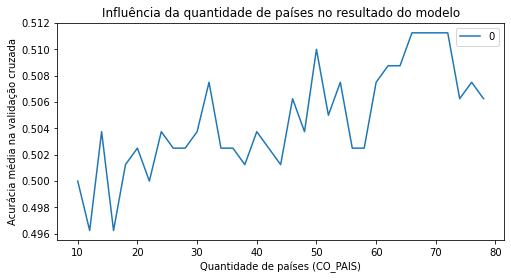

In [23]:
# Teste do modelo preditivo Decision Tree - Versão 1.5.X
# Avalia influência da quantidade de países (coluna CO_PAIS)
# Item 5.4.6 do TCC
# -----------------

param = deepcopy(p1_lista_modelo)
param.imprimir_parametros = False
param.imprimir_resultados = False
pos_v = 1
acc_m=[]
faixa = np.arange(10,80,2)
for valor in faixa:
    df_temp = df_base.copy()                 
    param.l_co_pais = param.l_completa_co_pais[0:valor]
    param.versao = f'1.5.{pos_v}'
    acc_m.append(processa_modelos_DT(df_temp, param, f'influência da quantidade de países: {valor}'))
    pos_v = pos_v+1

# plota gráfico para avaliação da variação da acurácia em função da quantidade de itens na coluna
res_acc= pd.DataFrame (acc_m, faixa)
res_acc.plot(figsize=(8,4), ylabel='Acurácia média na validação cruzada', 
             xlabel='Quantidade de países (CO_PAIS)',
             title = 'Influência da quantidade de países no resultado do modelo');

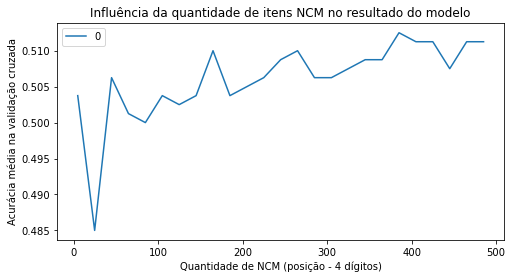

In [24]:
# Teste do modelo preditivo Decision Tree - Versão 1.6.X
# Avalia influência da quantidade de itens de NCM (posição com 4 dígitos)
# Item 5.4.7 do TCC
# -----------------

param = deepcopy(p1_lista_modelo)
param.imprimir_parametros = False
param.imprimir_resultados = False
param.opcao_NCM = 4
pos_v = 1
acc_m=[]
faixa = np.arange(5,500,20)
for valor in faixa:
    df_temp = df_base.copy()                 
    param.versao = f'1.6.{pos_v}'
    param.l_ncm_4 = param.l_completa_ncm_4[0:valor]
    acc_m.append(processa_modelos_DT (df_temp, param, f'influência da quantidade de NCM: {valor}' ))
    pos_v = pos_v+1

# plota gráfico para avaliação da variação da acurácia em função da quantidade de itens na coluna
res_acc= pd.DataFrame (acc_m, faixa)
res_acc.plot(figsize=(8,4), ylabel='Acurácia média na validação cruzada', 
             xlabel='Quantidade de NCM (posição - 4 dígitos)',
             title = 'Influência da quantidade de itens NCM no resultado do modelo');

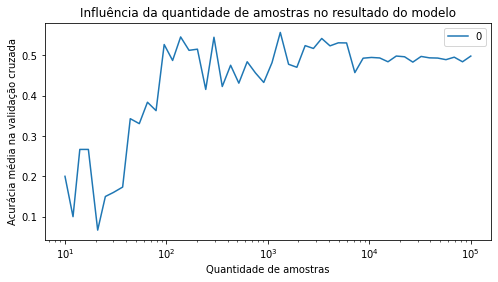

In [25]:
# Teste do modelo preditivo Decision Tree - Versão 1.7.X
# Avalia influência da quantidade de amostras a serem extraídas
# Item 5.4.8 do TCC
# -----------------

param = deepcopy(p1_lista_modelo)
param.imprimir_parametros = False
param.imprimir_resultados = False
param.opcao_NCM = 4
pos_v = 1
acc_m=[]
faixa = np.logspace(1, 5, 50).astype(int)
for valor in faixa:
    df_temp = df_base.copy()                 
    param.versao = f'1.7.{pos_v}'
    param.qtd_amostras = valor
    acc_m.append(processa_modelos_DT(df_temp, param, f'influência da quantidade de amostras: {valor}'))
    pos_v = pos_v+1

# plota gráfico para avaliação da variação da acurácia em função da quantidade de amostras
res_acc= pd.DataFrame (acc_m, faixa)
fig = res_acc.plot(figsize=(8,4), ylabel='Acurácia média na validação cruzada', 
                   xlabel='Quantidade de amostras',
                   title = 'Influência da quantidade de amostras no resultado do modelo');
fig.set_xscale('log')

In [26]:
# Aplicação dos melhores resultados ao modelo base-line
# Item 5.4.9 do TCC
# -----------------

param = deepcopy(p1_lista_modelo)
df_temp = df_base.copy()
param.versao = '2.1.1'
param.imprimir_parametros = True
param.imprimir_resultados = True

# utiliza a NCM posição (dígitos)
param.opcao_NCM = 4
# acrescenta as vias de transporte principais
param.l_co_via = param.l_completa_co_via[0:3]

# passa número de amostras para 10 mil
param.qtd_amostras = 10000
p1_lista_modelo = deepcopy(param)
   

# quarta abrodagem para tratamento dos outliers
df_temp = df_base.copy()
param.versao = '1.2.4'
Q1=df_temp['VL_FOB'].quantile(0.25)
Q3=df_temp['VL_FOB'].quantile(0.75)
IQR=Q3-Q1
lim_inf = Q1 - 1.5 * IQR 
lim_sup = Q3 + 1.5 * IQR
# separa os outliers
df_outliers = df_temp[df_temp['VL_FOB']>lim_sup]
df_temp = df_temp[df_temp['VL_FOB']<=lim_sup]
# redistribui os outliers, gerando n linhas para cada outlier
#  onde n é a divisão inteira (ceiling) entre o valor FOB e o limite superior
df_outliers['fator'] = ((df_outliers['VL_FOB'] // lim_sup) + 1).astype(int)
df_outliers['VL_FOB'] = df_outliers['VL_FOB'] / df_outliers['fator']
df_outliers['KG_LIQUIDO'] = df_outliers['KG_LIQUIDO'] / df_outliers['fator']
df_outliers = df_outliers.loc[df_outliers.index.repeat(df_outliers['fator'])].reset_index(drop=True)
df_outliers.drop(['fator'], axis=1, inplace=True)
df_temp = pd.concat([df_temp,df_outliers], axis=0)
# armazena o dataset processado
df_base = df_temp.copy()
        
acc_media_cross = processa_modelos_DT (df_temp, param, 'uso das melhores estratégias identificadas')

Teste do modelo DecisionTree - versão 1.2.4 (uso das melhores estratégias identificadas)
     Itens para cada coluna: CO_PAIS: 22, CO_URF: 15, CO_VIA: 3, SG_UF_NCM: 7
     Quantidade de NCM (posição 4 dígitos): 159
     Quantidade amostras: 10000, Proporção teste: 0.2
     Quantidade de colunas do dataset (incluindo dummies): 224
Validação cruzada: Acurácia média: 56.97% -- Intervalo: [53.02% ~ 60.93%]
Predição sobre amostras de teste: 1130 acertos em 2000 (56.50%) (treinamento com 8000)
Tempo para treinamento: 121.674 ms


In [27]:
# Otimização dos hiperparâmetros utilizando GridSearchCV
# Item 5.4.10 do TCC
# ------------------

param.imprimir_parametros = False
param.otimizar_com_grid_search = True
# guarda o modelo DecisionTree otimizado na variável ml_modelo_final_DT
acc_media_cross, ml_modelo_final_DT=processa_modelos_DT(df_temp, param,'com otimização GridSearchCV')

Teste do modelo DecisionTree - versão 1.2.4 (com otimização GridSearchCV)
      Resultado GridSearchCV: {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 8}
Validação cruzada: Acurácia média: 70.38% -- Intervalo: [67.63% ~ 73.12%]
Predição sobre amostras de teste: 1410 acertos em 2000 (70.50%) (treinamento com 8000)
Tempo para treinamento: 305.183 ms


In [28]:
# Treinamento e teste do Modelo Random Forest Classifier
# ITEM 5.5.1 do TCC
# -----------------

df_temp = df_base.copy()
param = deepcopy(p1_lista_modelo)
param.qtd_amostras = 10000
param.otimizar_com_grid_search = False

# Seleciona amostras aleatórias, gerando um novo dataframe de trabalho
np.random.seed(i_SEED)
indices = np.random.choice(df_temp.shape[0], replace = False, size=param.qtd_amostras)
df_temp = df_temp.iloc[indices]

# Prepara o dataset para divisão das amostras entre treinamento e teste
df_temp['FOB_KILO'] = df_temp['VL_FOB'] / df_temp['KG_LIQUIDO']
df_temp['SG_UF_NCM'] = pd.factorize(df_temp['SG_UF_NCM'])[0] + 1
df_temp = df_temp.drop(['CO_ANO','NCM_6','CO_NCM'], axis=1)
df_temp.loc[~df_temp['CO_URF'].isin(p1_lista_modelo.l_co_urf), 'CO_URF'] = 111111
df_X = df_temp[df_temp.columns[~pd.Series(df_temp.columns).str.startswith('CO_URF')]]
df_y = df_temp[df_temp.columns[pd.Series(df_temp.columns).str.startswith('CO_URF')]]
df_y = df_y.values.ravel()
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(df_X, df_y, test_size = 0.2, 
                                                                  random_state = i_SEED)

# Prepara a validação cruzada
np.random.seed(i_SEED)
cv = KFold(n_splits = 5, shuffle = True)

ml_modelo_final_RF=RandomForestClassifier(n_estimators=1000)
print('Teste do modelo Random Forest')

results = cross_val_score(ml_modelo_final_RF, X_treinamento, y_treinamento, cv = cv, 
                          scoring = 'accuracy')
acc_media_cross_val = intervalo_acc(results, True)

# Roda o modelo preditivo com os dados de teste
start_time = time.time()
ml_modelo_final_RF.fit(X_treinamento, y_treinamento)
total_time = time.time() - start_time
y_pred = ml_modelo_final_RF.predict(X_teste)

itens_corretos = (y_teste==y_pred).sum()
total_itens = y_pred.shape[0]
percentual = 100*(itens_corretos/total_itens)

print(f'Predição sobre amostras de teste: {itens_corretos} acertos em {total_itens} ({percentual:.2f}%)'
      f' (treinamento com {X_treinamento.shape[0]})')
print(f'Tempo para treinamento: {1000 * total_time:.3f} ms')

if param.otimizar_com_grid_search:
    param_dict = { 'criterion':['gini','entropy'], 'n_estimators':[100,1000,10000,10000],
                  'max_depth':range(7,10), 'min_samples_split':range(2,5), 
                  'min_samples_leaf':range(1,3), 'bootstrap':[True,False] }
    grid = GridSearchCV (ml_modelo_final_RF, param_grid=param_dict, cv=10, verbose=0, n_jobs=-1)
    grid.fit(X_treinamento, y_treinamento)
    print(f'      Resultado GridSearchCV: {grid.best_params_}')
    ml_modelo_final_RF = grid.best_estimator_

    start_time = time.time()
    ml_modelo_final_RF.fit(X_treinamento, y_treinamento)
    total_time = time.time() - start_time
    y_pred = ml_modelo_final_RF.predict(X_teste)

    itens_corretos = (y_teste==y_pred).sum()
    total_itens = y_pred.shape[0]
    percentual = 100*(itens_corretos/total_itens)

    print(f'Resultados após otimização com GridSearchCV:')
    print(f'   Predição sobre amostras de teste: {itens_corretos} acertos em {total_itens} '
          f'({percentual:.2f}%) (treinamento com {X_treinamento.shape[0]})')
    print(f'   Tempo para treinamento: {1000 * total_time:.3f} ms')

Teste do modelo Random Forest
Validação cruzada: Acurácia média: 84.24% -- Intervalo: [82.45% ~ 86.03%]
Predição sobre amostras de teste: 1651 acertos em 2000 (82.55%) (treinamento com 8000)
Tempo para treinamento: 16219.291 ms


In [29]:
# Avalia importância das features utilizadas no modelo Random Forest
# ITEM 5.5.2 do TCC
# -----------------
importancia = pd.DataFrame({'Variável': df_X.columns.values, 
                            'Importância (%)': 100 * ml_modelo_final_RF.feature_importances_})
importancia.sort_values(by=['Importância (%)'], ascending=False)

,Variável,Importância (%)
2,SG_UF_NCM,30.230556
3,CO_VIA,13.464260
4,KG_LIQUIDO,10.903689
5,VL_FOB,10.829194
8,FOB_KILO,10.508473
7,NCM_4,9.288283
1,CO_PAIS,6.089083
6,VALOR_DOLAR,4.829989
0,CO_MES,3.856473


In [30]:
# Modelo Naive Bayes (Categorical)
# Item 5.6 do TCC
# ---------------

df_temp = df_base.copy()
param = deepcopy(p1_lista_modelo)
param.qtd_amostras = 10000
param.otimizar_com_grid_search = False

# Seleciona amostras aleatórias, gerando um novo dataframe de trabalho
np.random.seed(i_SEED)
indices = np.random.choice(df_temp.shape[0], replace = False, size=10000)
df_temp = df_temp.iloc[indices]

# Prepara o dataset para divisão das amostras entre treinamento e teste
df_temp.loc[~df_temp['CO_PAIS'].isin(p1_lista_modelo.l_co_pais), 'CO_PAIS'] = '9999'
df_temp.loc[~df_temp['CO_VIA'].isin(p1_lista_modelo.l_co_via), 'CO_VIA'] = '9999'
df_temp.loc[~df_temp['SG_UF_NCM'].isin(p1_lista_modelo.l_sg_uf_ncm), 'SG_UF_NCM'] = 'OUTRAS_UF'
df_temp.loc[~df_temp['NCM_4'].isin(p1_lista_modelo.l_ncm_4), 'NCM_4'] = '999999'
df_temp.loc[~df_temp['CO_URF'].isin(p1_lista_modelo.l_co_urf), 'CO_URF'] = 111111
df_temp['SG_UF_NCM'] = pd.factorize(df_temp['SG_UF_NCM'])[0] + 1
df_temp = df_temp.drop(['VL_FOB','KG_LIQUIDO'], axis=1)
df_temp = df_temp.drop(['CO_ANO','NCM_6','CO_NCM'], axis=1)

print('Teste do modelo Naive Bayes')

df_X = df_temp[df_temp.columns[~pd.Series(df_temp.columns).str.startswith('CO_URF')]]
df_y = df_temp[df_temp.columns[pd.Series(df_temp.columns).str.startswith('CO_URF')]]
df_y = df_y.values.ravel()
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(df_X, df_y, test_size = 0.2, 
                                                                  random_state = i_SEED)

# Prepara a validação cruzada
np.random.seed(i_SEED)
cv = KFold(n_splits = 5, shuffle = True)
ml_modelo_final_NB = CategoricalNB(alpha = 0.1, fit_prior = False)
ml_modelo_final_NB.fit(X_treinamento, y_treinamento)
results = cross_val_score(ml_modelo_final_NB, X_treinamento, y_treinamento, cv = cv, 
                          scoring = 'accuracy')
acc_media_cross_val = intervalo_acc(results, True)

# Roda o modelo preditivo com os dados de teste
start_time = time.time()
ml_modelo_final_NB.fit(X_treinamento, y_treinamento)
total_time = time.time() - start_time
y_pred = ml_modelo_final_NB.predict(X_teste)

itens_corretos = (y_teste==y_pred).sum()
total_itens = y_pred.shape[0]
percentual = 100*(itens_corretos/total_itens)
print(f'Predição sobre amostras de teste: {itens_corretos} acertos em {total_itens} '
      f'({percentual:.2f}%) (treinamento com {X_treinamento.shape[0]})')
print(f'Tempo para treinamento: {1000 * total_time:.3f} ms')

if param.otimizar_com_grid_search:
    param_dict = { 'alpha':[0.1,1,1.5,2,2.5,3], 
                   'fit_prior':[True,False] }
    grid = GridSearchCV (ml_modelo_final_NB, param_grid=param_dict, cv=10, verbose=0, n_jobs=-1)
    grid.fit(X_treinamento, y_treinamento)
    print(f'      Resultado GridSearchCV: {grid.best_params_}')
    ml_modelo_final_NB = grid.best_estimator_

    start_time = time.time()
    ml_modelo_final_NB.fit(X_treinamento, y_treinamento)
    total_time = time.time() - start_time
    y_pred = ml_modelo_final_NB.predict(X_teste)

    itens_corretos = (y_teste==y_pred).sum()
    total_itens = y_pred.shape[0]
    percentual = 100*(itens_corretos/total_itens)

    print(f'Resultados após otimização com GridSearchCV:')
    print(f'   Predição sobre amostras de teste: {itens_corretos} acertos em {total_itens} '
          f'({percentual:.2f}%) (treinamento com {X_treinamento.shape[0]})')
    print(f'   Tempo para treinamento: {1000 * total_time:.3f} ms')

Teste do modelo Naive Bayes
Validação cruzada: Acurácia média: 70.55% -- Intervalo: [68.35% ~ 72.75%]
Predição sobre amostras de teste: 1395 acertos em 2000 (69.75%) (treinamento com 8000)
Tempo para treinamento: 453.855 ms


Predição sobre amostras de teste: 1672 acertos em 2000 (83.60%)


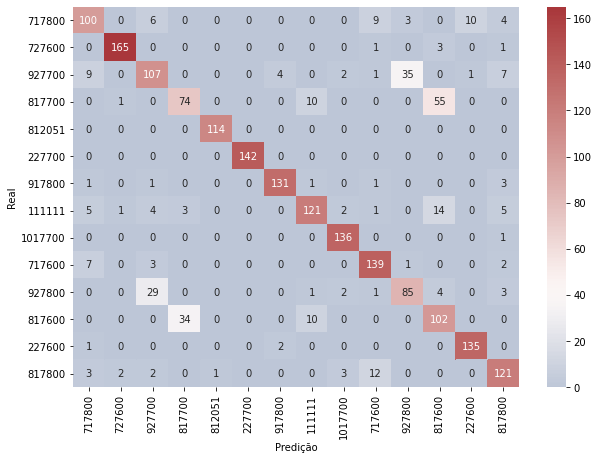

In [31]:
# Avaliação de erros e acertos do Random Forest Classifier
# Analisa cada local de desembarque com mapa de calor
# ITEM 5.7 do TCC
# ---------------

def amostragem_k_elementos(group, k=100):
    if len(group) < k:
        return group
    return group.sample(k)

df_temp = df_base.copy()
param = deepcopy(p1_lista_modelo)
param.qtd_amostras = 10000
param.otimizar_com_grid_search = False

# balanceamento das amostras
df_temp.loc[~df_temp['CO_URF'].isin(p1_lista_modelo.l_co_urf), 'CO_URF'] = 111111
df_temp = df_temp.groupby('CO_URF').apply(amostragem_k_elementos, k=5000).reset_index(drop=True)
df_temp.reset_index(inplace=True, drop=True)
np.random.seed(i_SEED)
indices = np.random.choice(df_temp.shape[0], replace = False, size=param.qtd_amostras)
df_temp = df_temp.iloc[indices]

# Prepara o dataset para divisão das amostras entre treinamento e teste
df_temp['FOB_KILO'] = df_temp['VL_FOB'] / df_temp['KG_LIQUIDO']
df_temp['SG_UF_NCM'] = pd.factorize(df_temp['SG_UF_NCM'])[0] + 1
df_temp = df_temp.drop(['CO_ANO','NCM_6','CO_NCM'], axis=1)

df_X = df_temp[df_temp.columns[~pd.Series(df_temp.columns).str.startswith('CO_URF')]]
df_y = df_temp[df_temp.columns[pd.Series(df_temp.columns).str.startswith('CO_URF')]]
df_y = df_y.values.ravel()
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(df_X, df_y, test_size = 0.2, 
                                                                  random_state = i_SEED)

ml_modelo_final_RF=RandomForestClassifier(n_estimators=1000)

# Roda o modelo preditivo com os dados de teste
start_time = time.time()
ml_modelo_final_RF.fit(X_treinamento, y_treinamento)
total_time = time.time() - start_time
y_pred = ml_modelo_final_RF.predict(X_teste)

itens_corretos = (y_teste==y_pred).sum()
total_itens = y_pred.shape[0]
percentual = 100*(itens_corretos/total_itens)

print(f'Predição sobre amostras de teste: {itens_corretos} acertos em {total_itens}'
      f' ({percentual:.2f}%)')

# Prepara gráfico de calor para ilustrar os erros e acertos do modelo
real = pd.Categorical(y_teste, categories=pd.Series(y_teste).unique(), ordered=False)
predito = pd.Categorical(y_pred, categories=pd.Series(y_teste).unique(), ordered=False)
cross_resultados = pd.crosstab(real, predito, rownames=['Real'], colnames=['Predição'], 
                               margins=False, dropna=False, normalize=False)
fig, ax = plt.subplots(figsize=(10,7)) 
fig1 = sns.heatmap(cross_resultados,ax =ax, annot=True, fmt='d',cmap="vlag",
                   center = cross_resultados.max().max()/4)

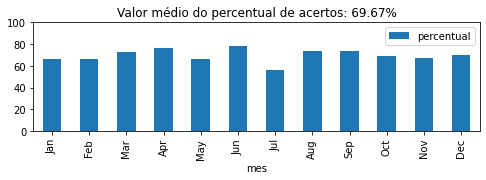

In [32]:
# Avaliação do modelo Random Forest com janela deslizante
# Treinamento feito nos doze meses anteriores ao teste
# Item 5.8 do TCC
# ---------------

df_temp = df_base.copy()
param = deepcopy(p1_lista_modelo)
param.qtd_amostras = 10000
param.otimizar_com_grid_search = False

# Prepara o dataset para divisão das amostras entre treinamento e teste
df_temp.loc[~df_temp['CO_URF'].isin(p1_lista_modelo.l_co_urf), 'CO_URF'] = 111111
df_temp['FOB_KILO'] = df_temp['VL_FOB'] / df_temp['KG_LIQUIDO']
df_temp['SG_UF_NCM'] = pd.factorize(df_temp['SG_UF_NCM'])[0] + 1
df_temp = df_temp.drop(['NCM_6','CO_NCM'], axis=1)

ml_modelo_final_RF=RandomForestClassifier(n_estimators=1000)
df_res_mes = pd.DataFrame(columns = ['mes','percentual'])
for mes in np.arange(1,13):
    # Treinamento será realizado com amostras de uma janela de 12 meses anterior ao mês de teste
    df_Trein = df_temp[ ((df_temp['CO_ANO']==2018) & (df_temp['CO_MES']>=mes)) | 
                       ((df_temp['CO_ANO']==2019) & (df_temp['CO_MES']<mes))]
    df_Trein = df_Trein.drop(['CO_ANO'], axis=1)
    df_Trein.reset_index(inplace=True, drop=True)

    np.random.seed(i_SEED)
    indices = np.random.choice(df_Trein.shape[0], replace = False, size=param.qtd_amostras)
    df_Trein = df_Trein.iloc[indices]
    df_Trein_X = df_Trein[df_Trein.columns[~pd.Series(df_Trein.columns).str.startswith('CO_URF')]]
    df_Trein_y = df_Trein[df_Trein.columns[pd.Series(df_Trein.columns).str.startswith('CO_URF')]]
    df_Trein_y = df_Trein_y.values.ravel()

    # Roda o modelo preditivo com os dados de teste
    start_time = time.time()
    ml_modelo_final_RF.fit(df_Trein_X, df_Trein_y)
    total_time = time.time() - start_time

    # Teste será realizado com amostras do ano de 2019, de apenas um mês (posterior à janela de treino)
    df_Teste = df_temp[ ((df_temp['CO_ANO']==2019) & (df_temp['CO_MES']==mes))]
    df_Teste = df_Teste.drop(['CO_ANO'], axis=1)

    np.random.seed(i_SEED)
    indices = np.random.choice(df_Teste.shape[0], replace = False, size=param.qtd_amostras//4)
    df_Teste = df_Teste.iloc[indices]
    df_Teste_X = df_Teste[df_Teste.columns[~pd.Series(df_Teste.columns).str.startswith('CO_URF')]]
    df_Teste_y = df_Teste[df_Teste.columns[pd.Series(df_Teste.columns).str.startswith('CO_URF')]]
    df_Teste_y = df_Teste_y.values.ravel()

    y_pred = ml_modelo_final_RF.predict(df_Teste_X)

    itens_corretos = (df_Teste_y==y_pred).sum()
    total_itens = y_pred.shape[0]
    percentual = 100*(itens_corretos/total_itens)
    df_res_mes = df_res_mes.append({'mes':calendar.month_abbr[mes], 'percentual':percentual}, 
                                   ignore_index=True)

media_acertos = df_res_mes['percentual'].values.mean()
titulo = f'Valor médio do percentual de acertos: {media_acertos:.2f}%'
ax = df_res_mes.plot(kind='bar',x='mes', figsize=(8,2), title = titulo)
r = ax.set_ylim(0,100)